# K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


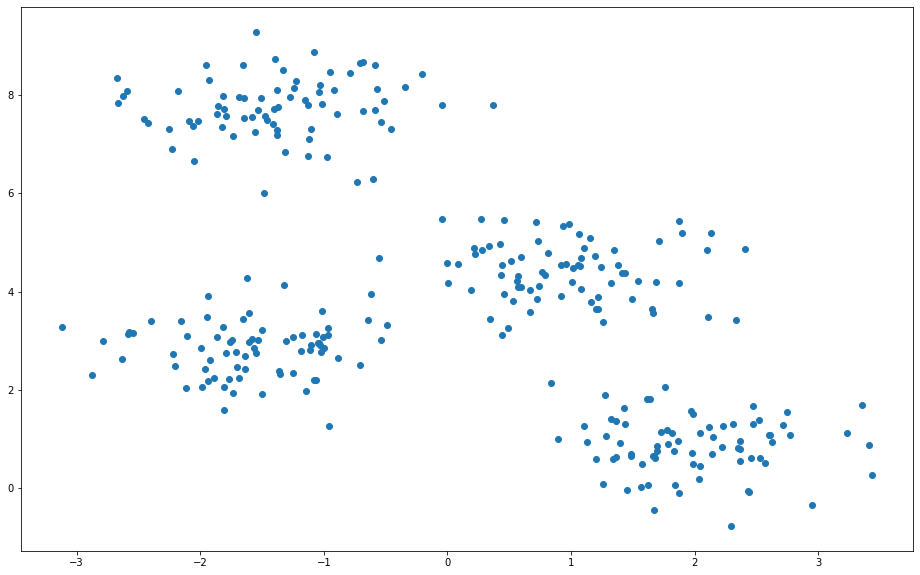

In [4]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.figure(figsize=(16,10))
plt.scatter(X[:,0], X[:,1])
plt.show()

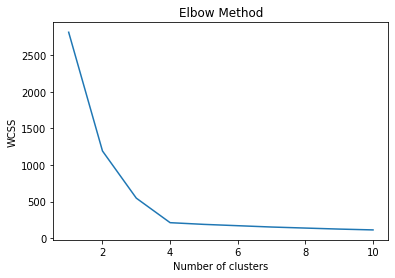

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

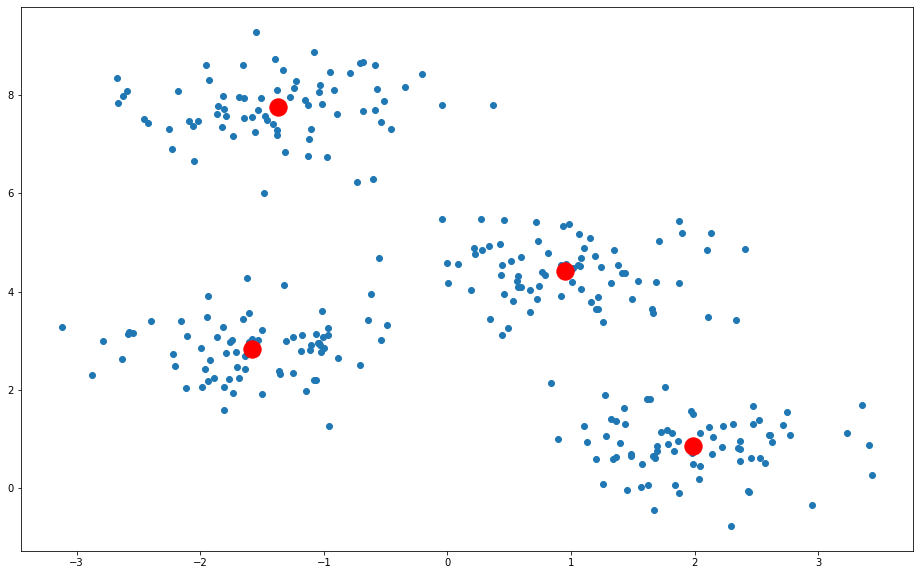

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.figure(figsize=(16,10))
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Centroid Neural Network (simple case: 2 clusters)

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

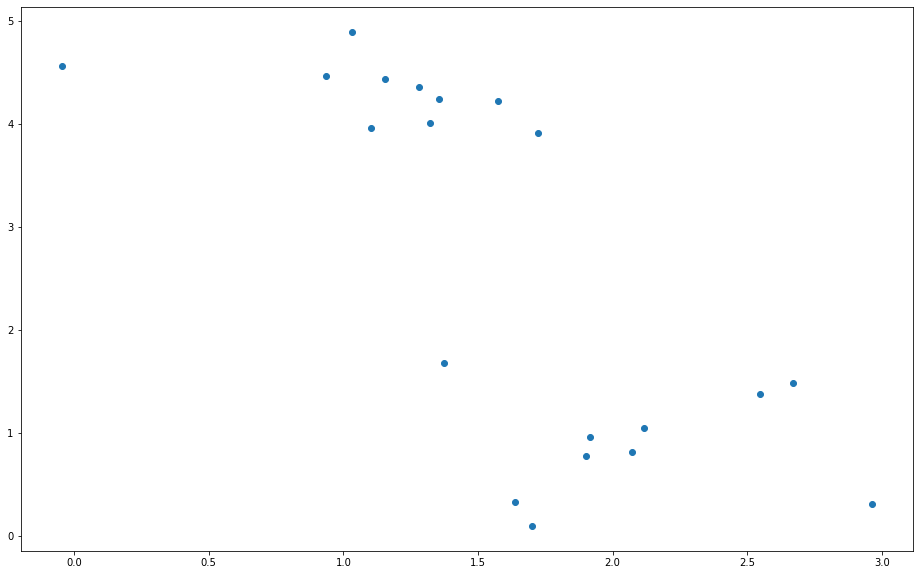

In [229]:
X, y = make_blobs(n_samples=20, centers=2, cluster_std=0.4, random_state=0)
plt.figure(figsize=(16, 10))
plt.scatter(X[:,0], X[:,1])
plt.show()

(1.6165217566853876, 2.5978483868647744)


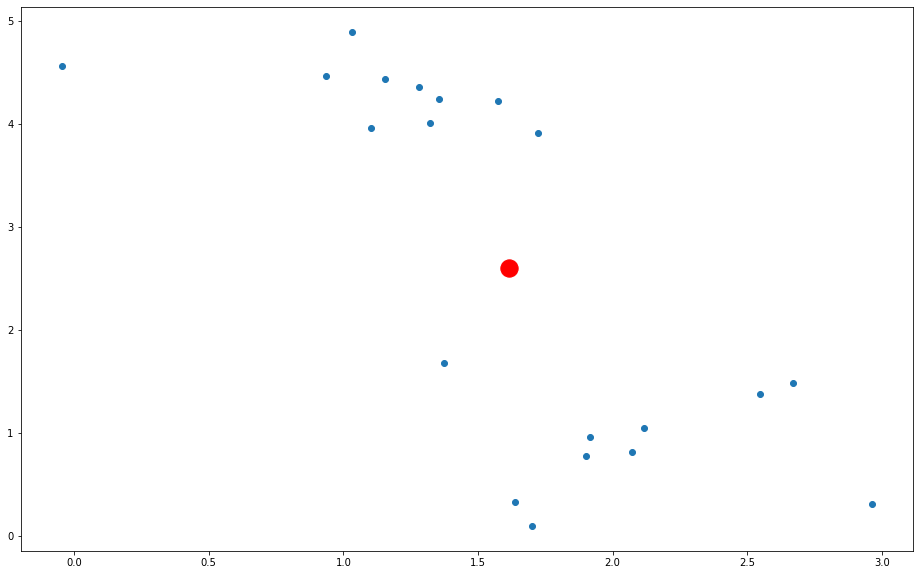

In [230]:
# Find Centroid of All Data
centroid_X = (np.average(X[:,0]), np.average(X[:,1]))
print(centroid_X)

plt.figure(figsize=(16,10))
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroid_X[0], centroid_X[1], s=300, c='red')
plt.show()

[[1.6665217566853876, 2.647848386864774], [1.5665217566853875, 2.5478483868647746]]


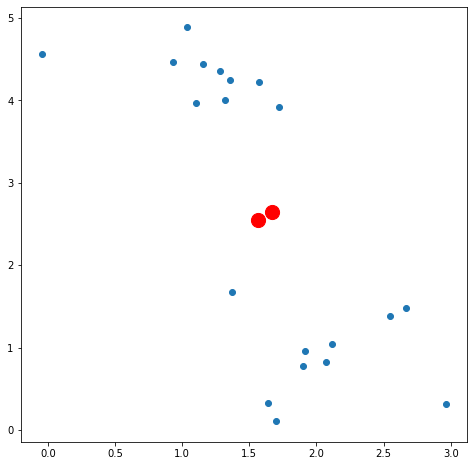

In [231]:
# Initialize W1 and W2 with Epsilon
epsilon = 0.05

w1 = [centroid_X[0] + epsilon, centroid_X[1] + epsilon]
w2 = [centroid_X[0] - epsilon, centroid_X[1] - epsilon]

w = []
w.append(w1)
w.append(w2)
print(w)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])

plt.scatter(w1[0], w1[1], s=200, c='red')
plt.scatter(w2[0], w2[1], s=200, c='red')
plt.show()

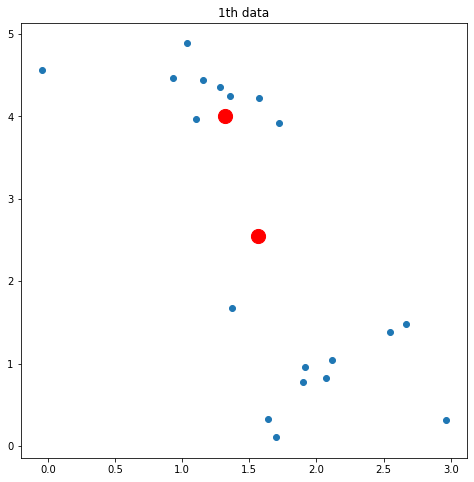

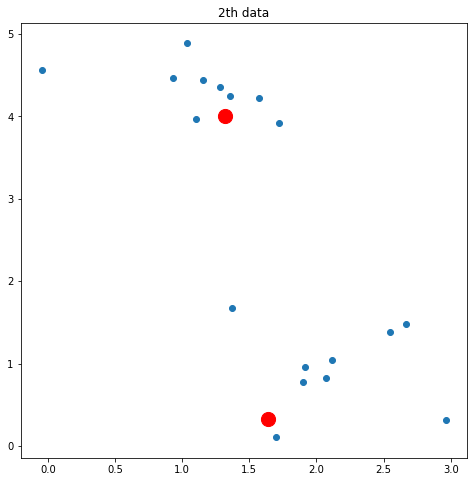

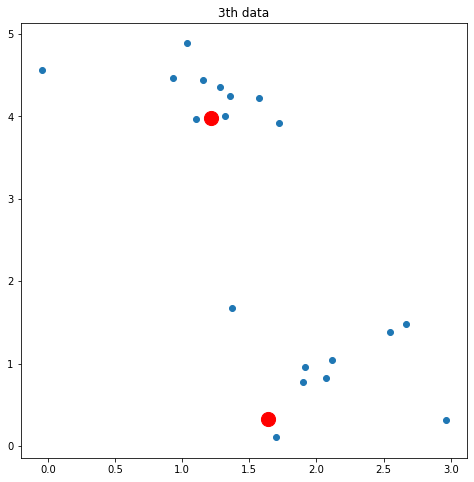

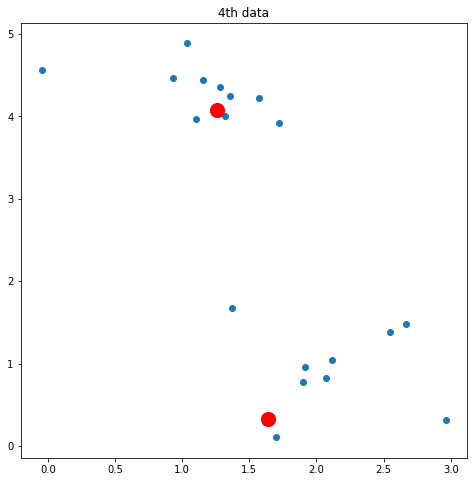

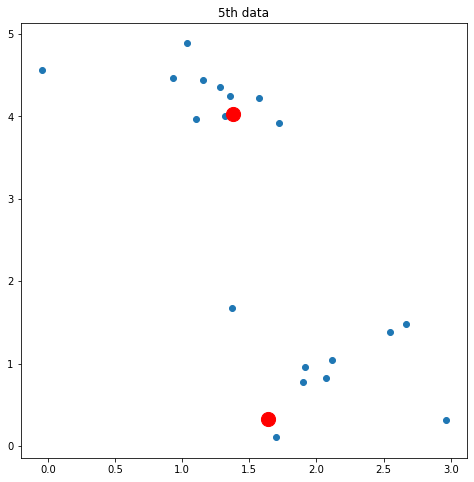

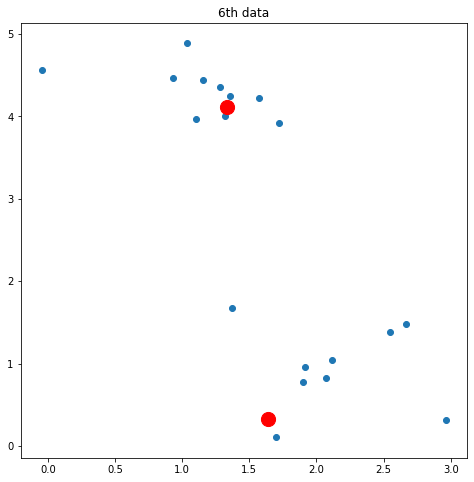

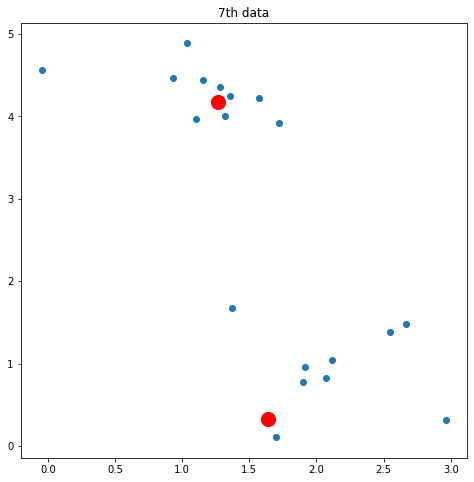

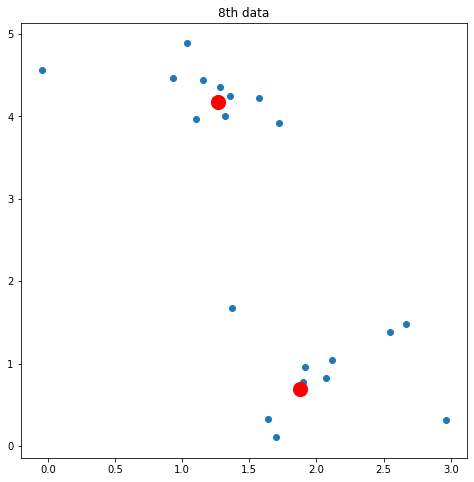

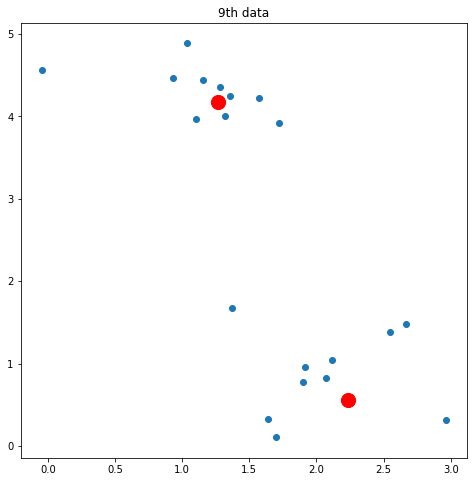

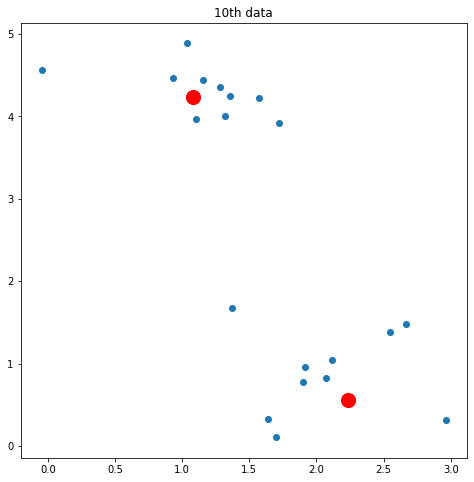

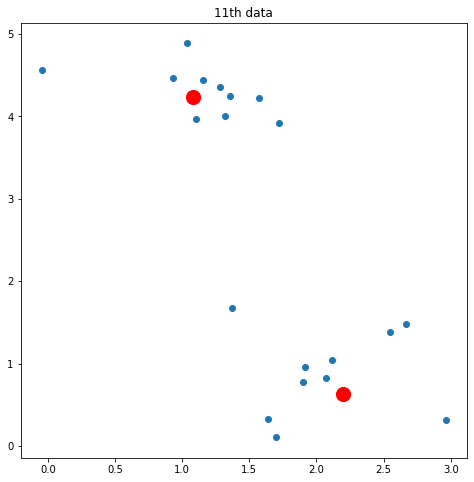

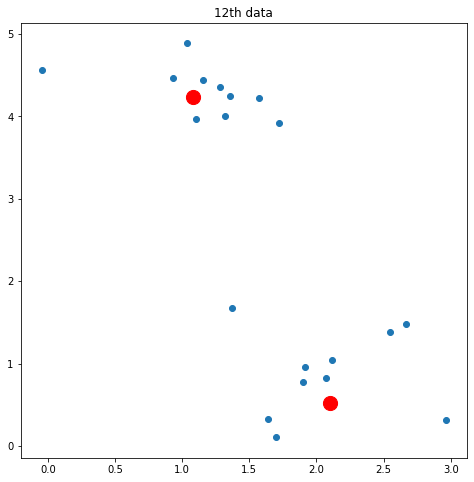

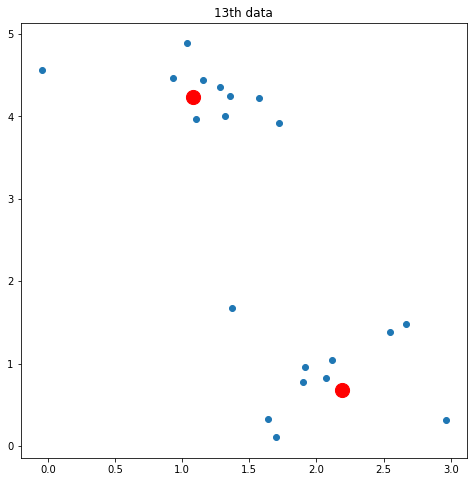

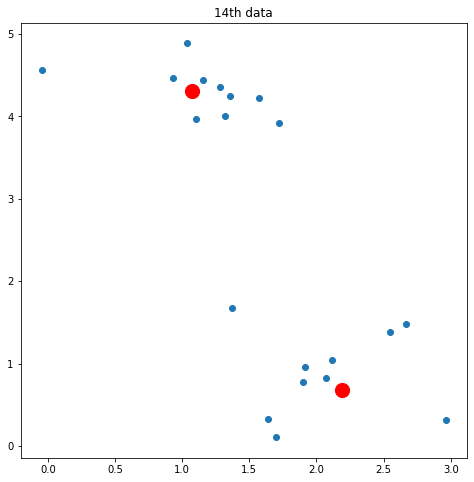

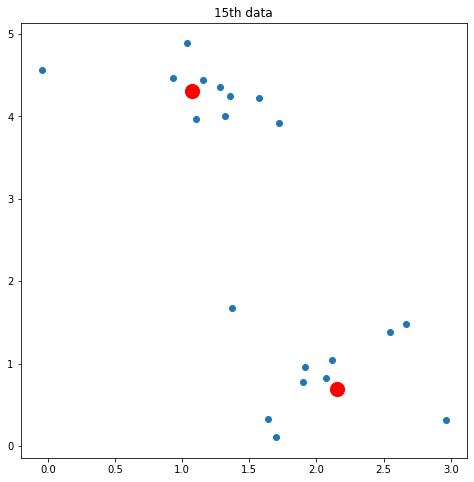

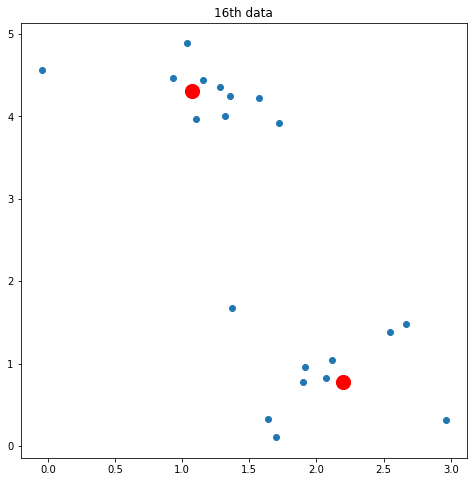

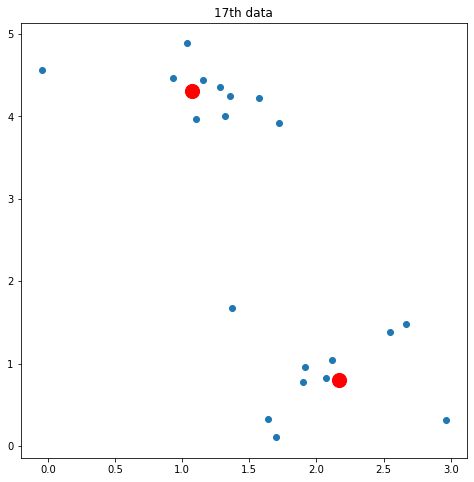

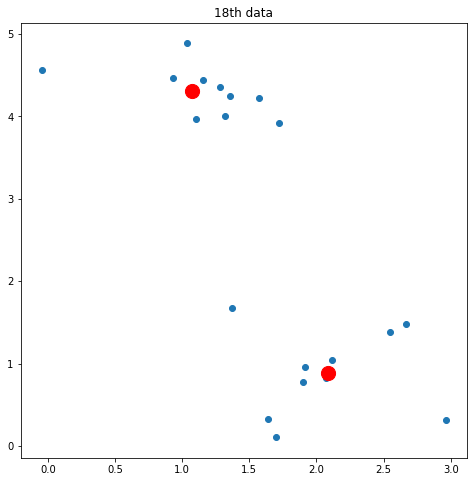

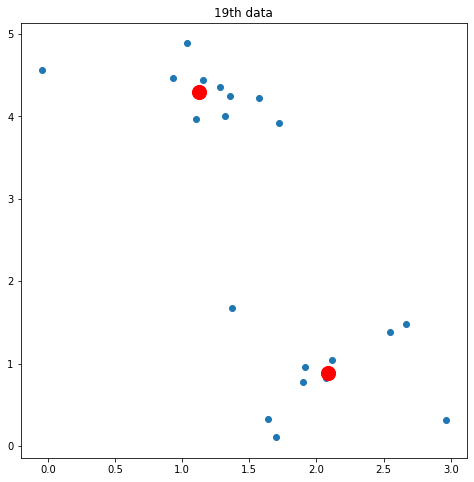

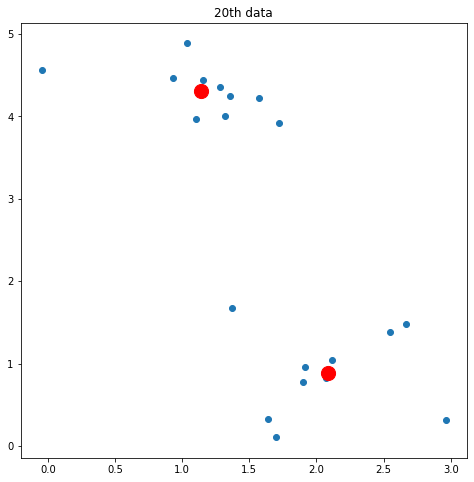

20 [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
[10 10]
[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]


In [232]:
########## EPOCH 0 ##########

w = []
w.append(w1)
w.append(w2)

num_clusters = 2

cluster_elements = []
for cluster in range(num_clusters):
    cluster_i = []
    cluster_elements.append(cluster_i)
# print("Cluster Elements:", cluster_elements)

cluster_lengths = np.zeros(num_clusters, dtype=int)
# print("Cluster Lengths:", cluster_lengths)

cluster_indices = []

data_th = 0
for x in X:
    data_th += 1
    # print(f"Process Data {data_th}")
    
    distances = []
    for w_i in w:
        dist = (x[0]-w_i[0])**2 + (x[1]-w_i[1])**2
        distances.append(dist)
    
    # find winner neuron
    index = distances.index(min(distances))
    
    # add cluster index of data x to a list
    cluster_indices.append(index)
    
    # update winner neuron
    w[index] = w[index] + 1/(1+cluster_lengths[index])*(x - w[index])
    
    # append data to cluster
    cluster_elements[index].append(x)
    # print(cluster_elements)
    
    cluster_lengths[index] += 1
    # print(cluster_lengths)

    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1])

    plt.scatter(w[0][0], w[0][1], s=200, c='red')
    plt.scatter(w[1][0], w[1][1], s=200, c='red')
    plt.title(f"{data_th}th data")
    plt.show()
    
cluster_elements = np.array(cluster_elements)

centroids = []
for i in range(num_clusters):
    centroid_i = (np.average(cluster_elements[i][:,0]), np.average(cluster_elements[i][:,1]))
    centroids.append(centroid_i)

# print("Weights:", w)    
# print("Centroids:", centroids)
# print(cluster_elements)

print(len(cluster_indices), cluster_indices)
print(cluster_lengths)
print(w)
print(centroids)

In [127]:
cluster_elements_all = cluster_elements
cluster_lengths_all = cluster_lengths
w_all = w
centroids_all = centroids

# print(cluster_elements_all)
# print(cluster_lengths_all)
print(w_all)
print(centroids_all)

[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]


0


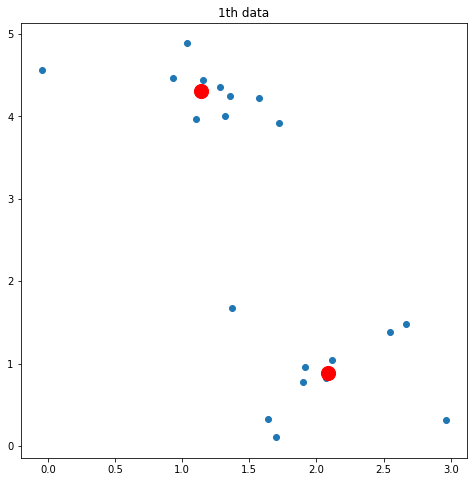

1


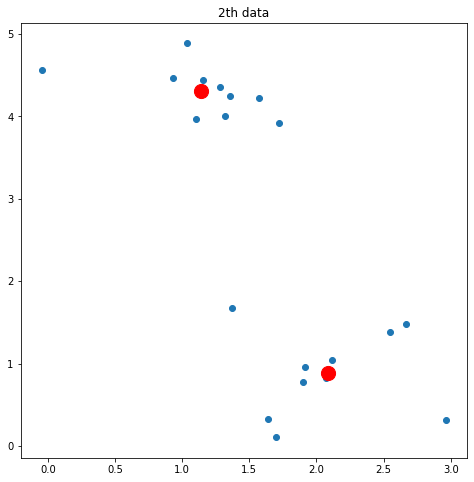

2


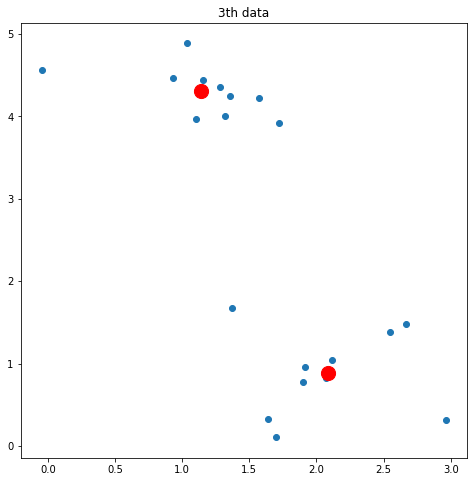

3


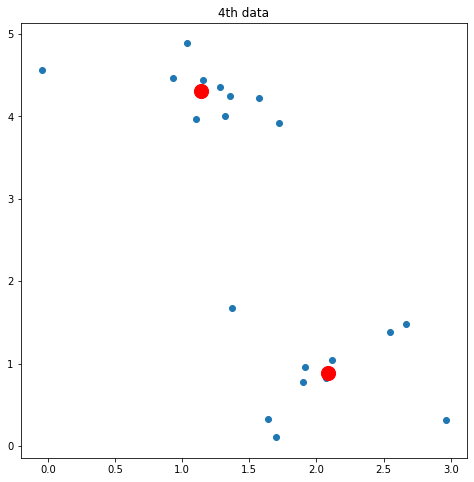

4


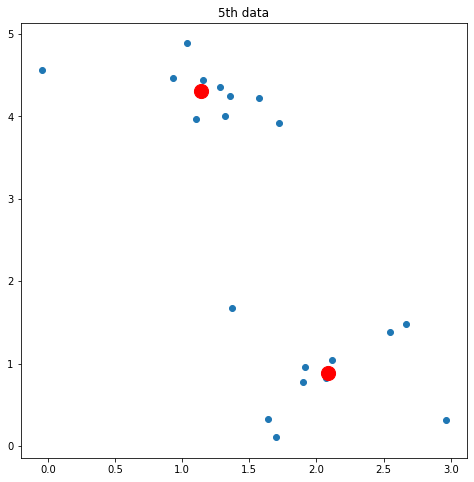

5


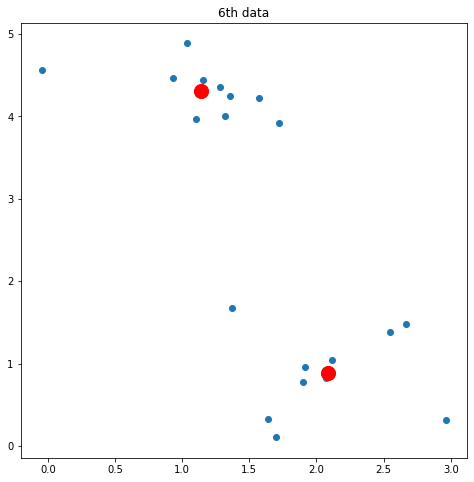

6


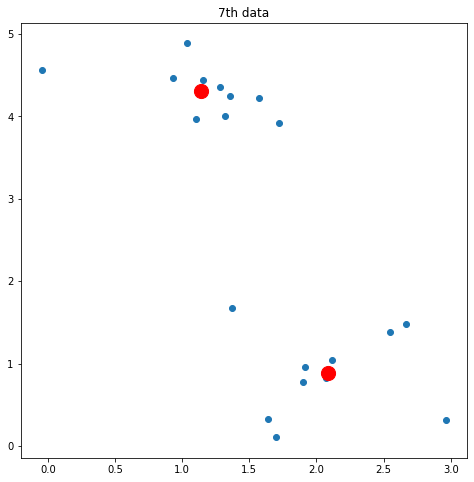

7


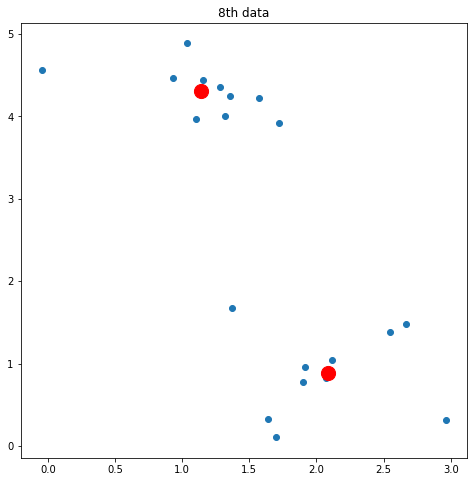

8


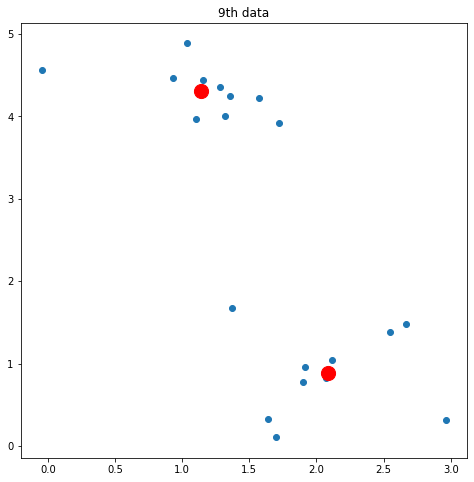

9


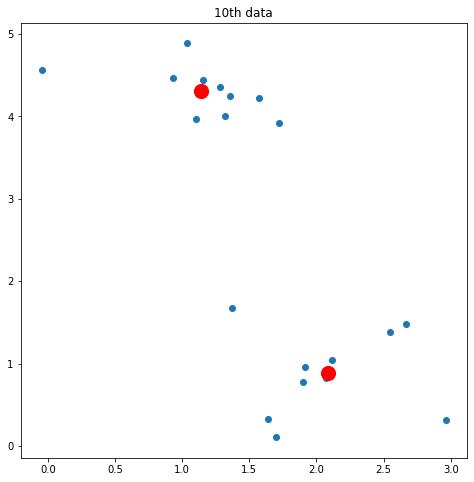

10


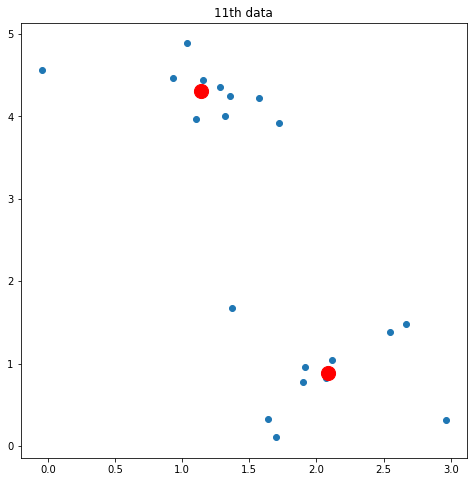

11


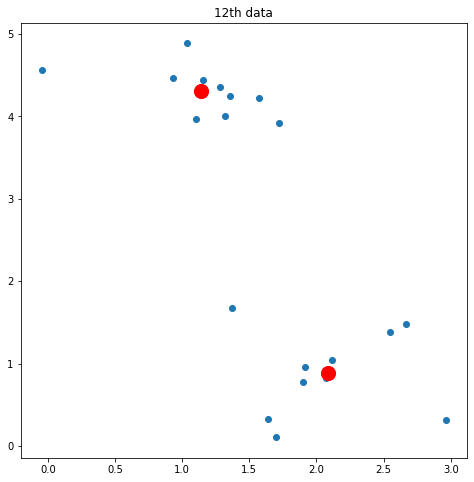

12


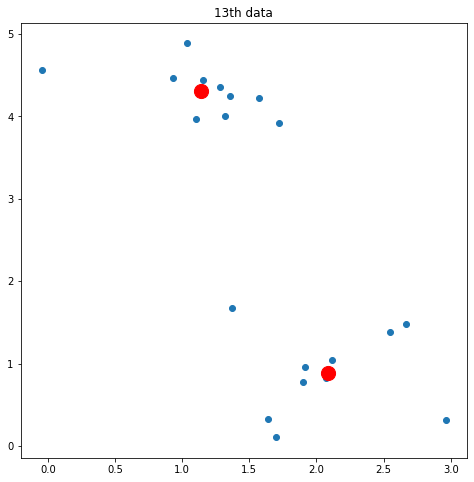

13


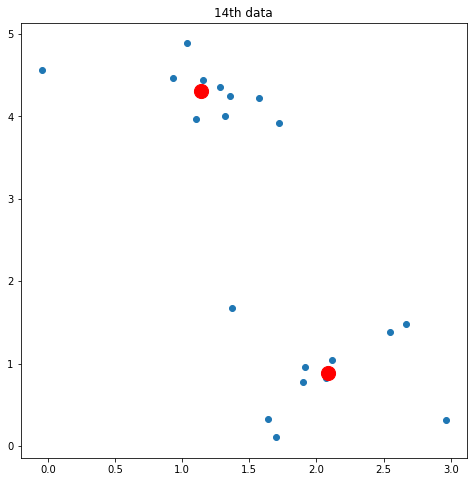

14


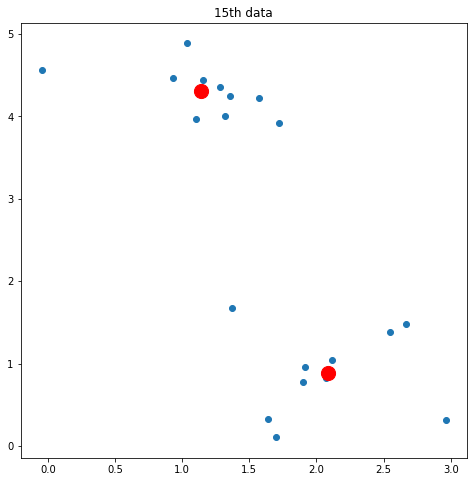

15


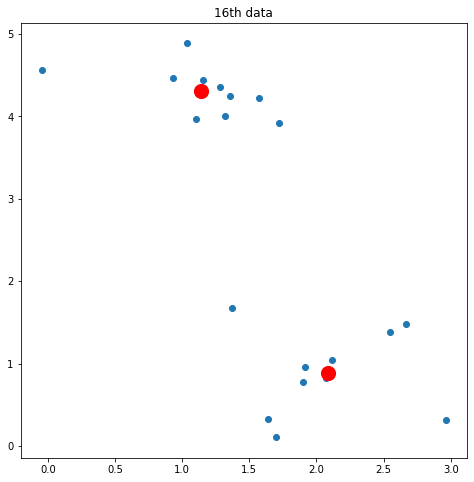

16


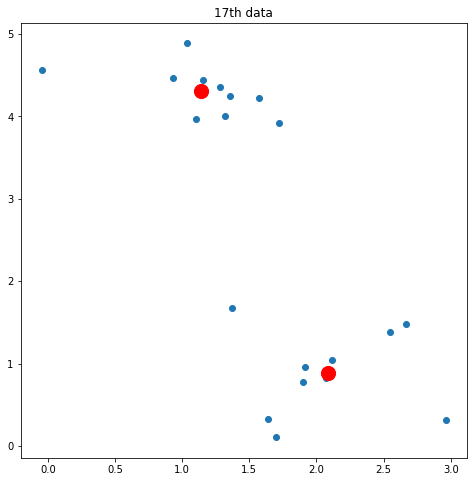

17


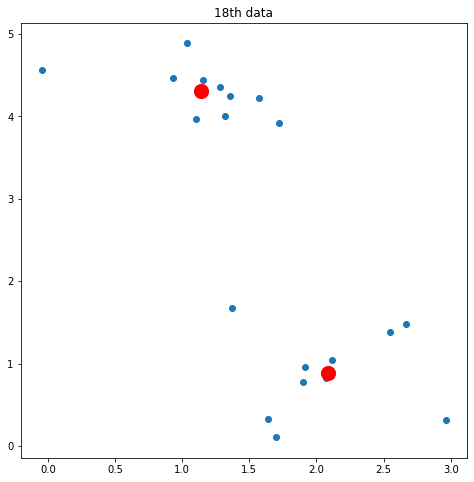

18


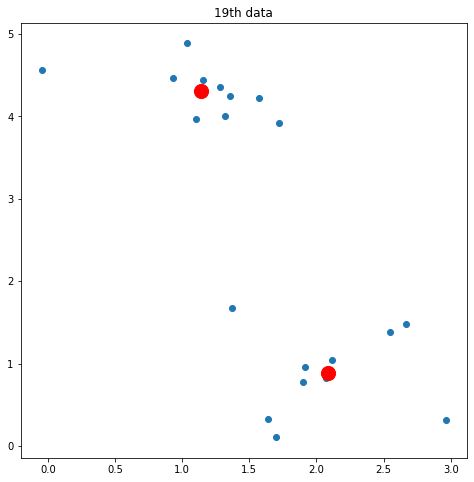

19


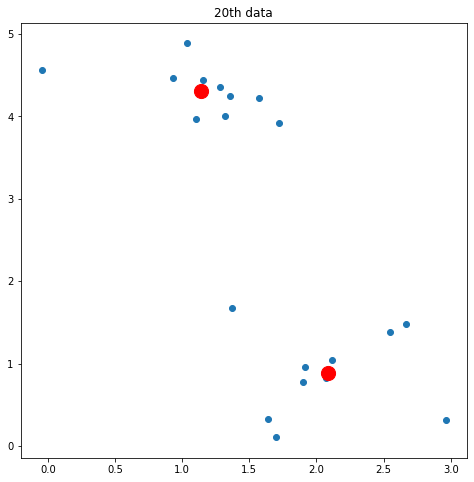

[[[ 1.32204456  4.00692132]
  [ 1.10149716  3.96214903]
  [ 1.35630545  4.24324444]
  [ 1.72329327  3.91287618]
  [ 1.15381537  4.43725706]
  [ 0.93498254  4.46802673]
  [-0.04492585  4.56523477]
  [ 1.03388751  4.88549673]
  [ 1.57390171  4.22172402]
  [ 1.28068517  4.35245733]]

 [[ 1.63584634  0.32965649]
  [ 2.11724649  1.04892867]
  [ 2.96316937  0.31591739]
  [ 2.07357093  0.82279012]
  [ 1.70015322  0.10534507]
  [ 2.66837921  1.48540717]
  [ 1.90033679  0.77674256]
  [ 2.54738379  1.3786156 ]
  [ 1.91610266  0.96020325]
  [ 1.37275945  1.67797382]]]
[10 10]
[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]
loser: 0
0


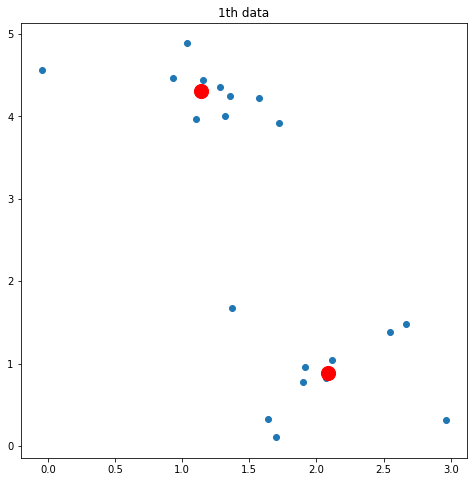

1


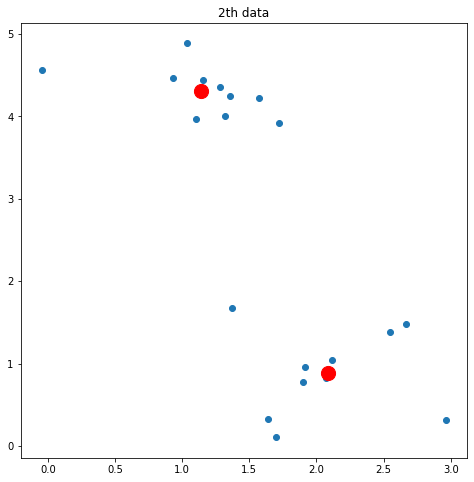

2


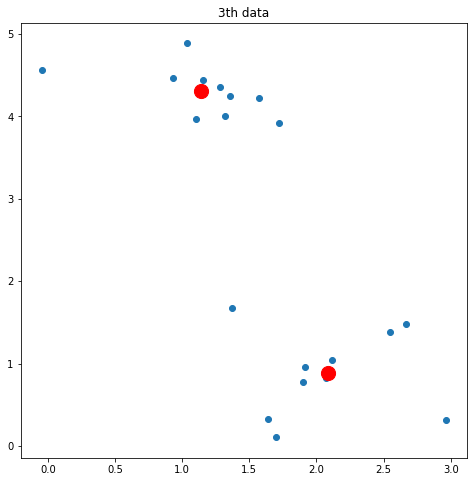

3


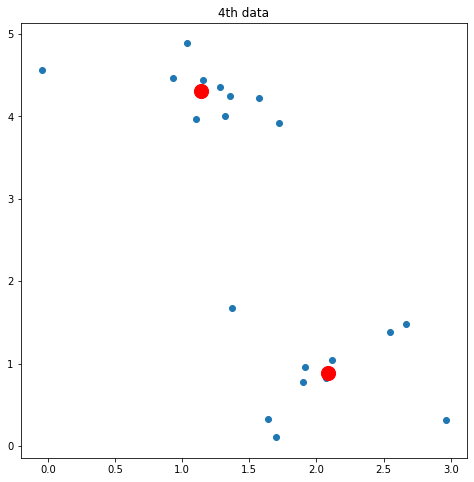

4


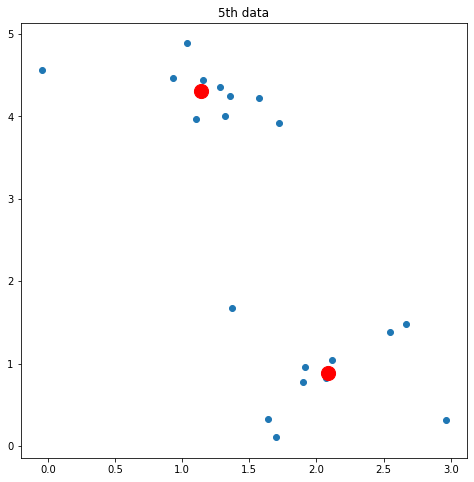

5


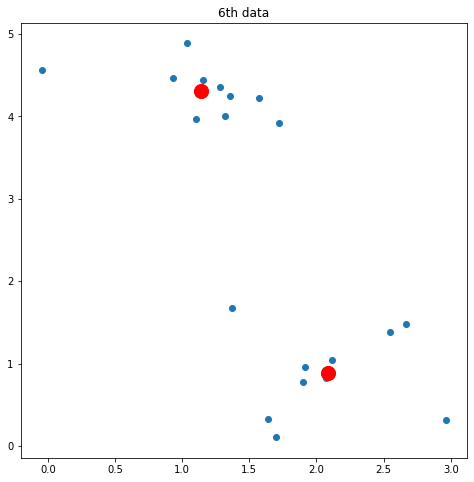

6


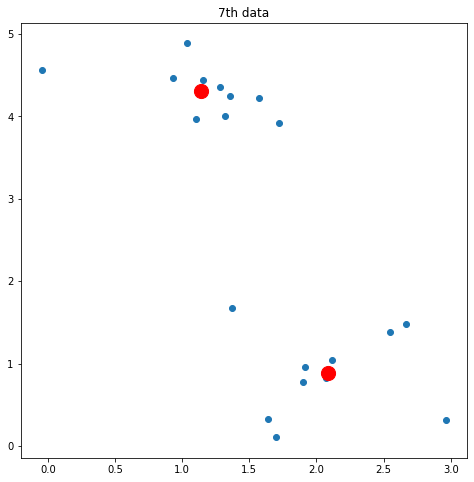

7


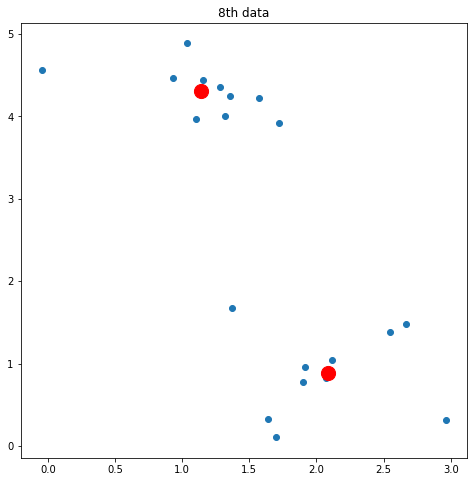

8


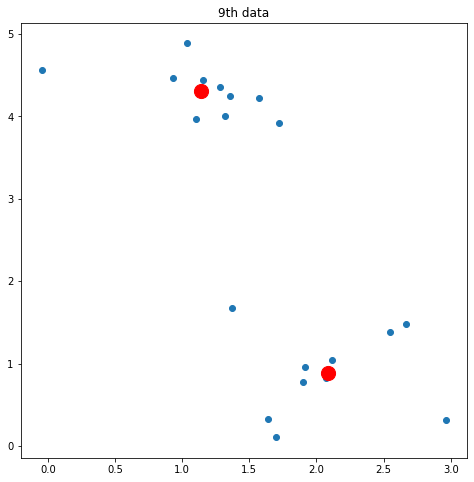

9


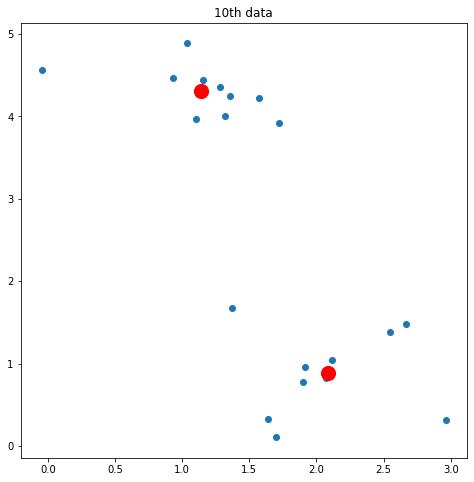

10


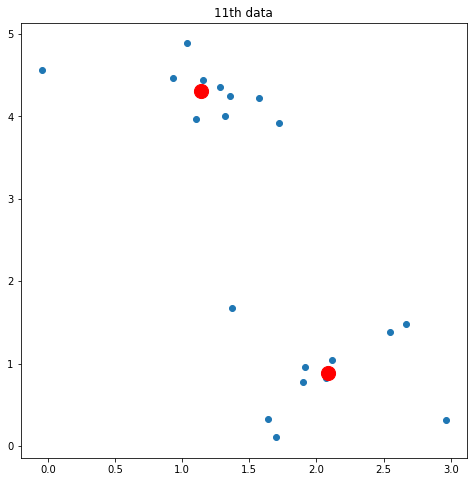

11


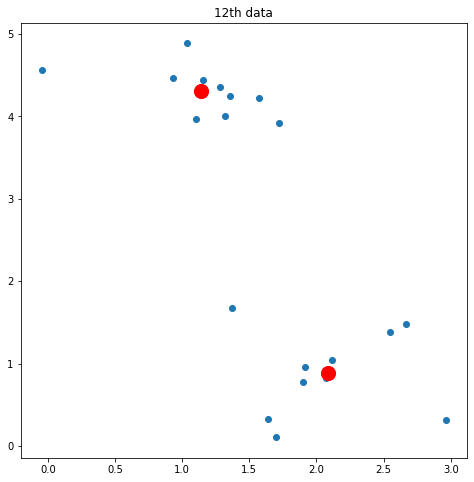

12


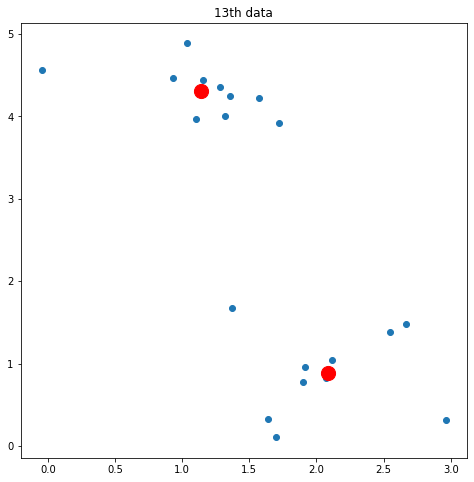

13


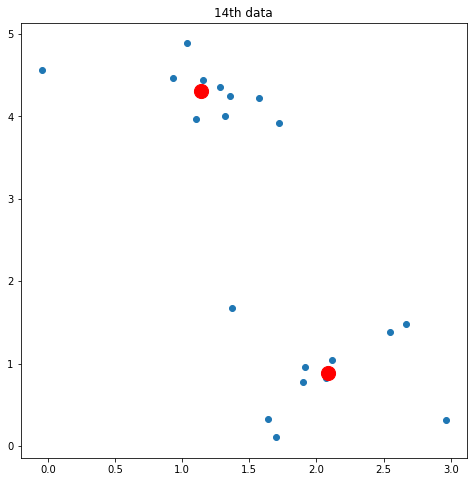

14


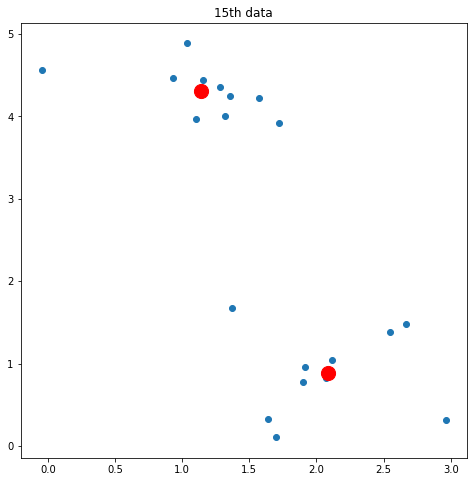

15


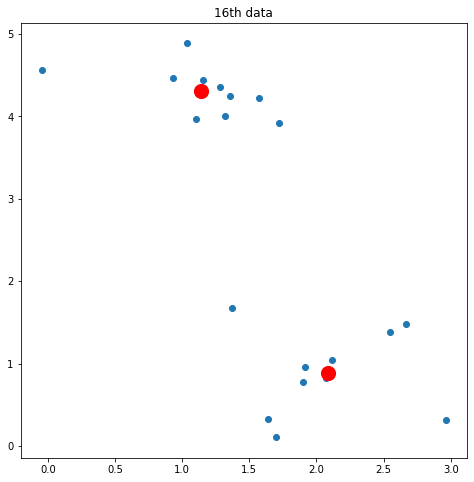

16


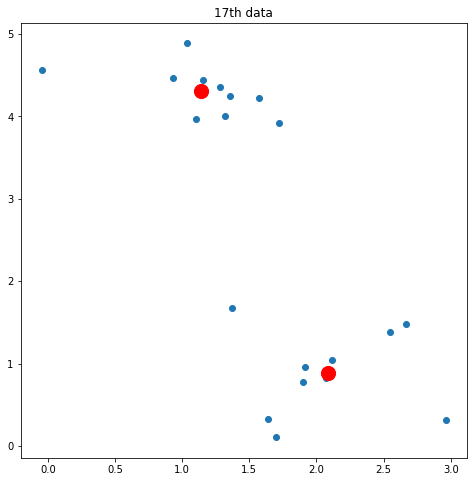

17


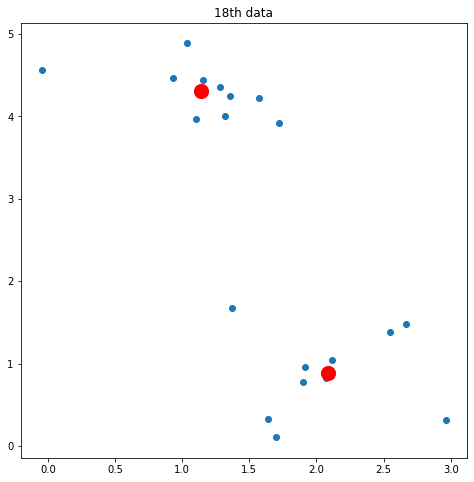

18


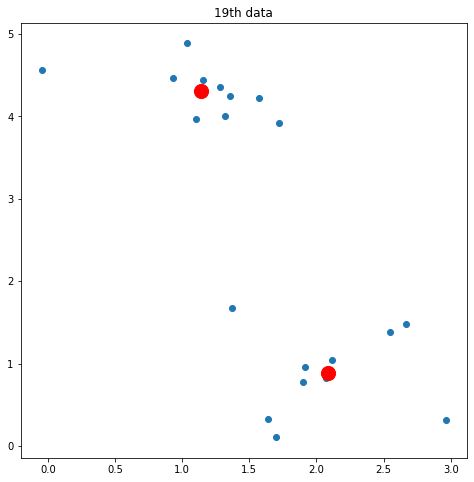

19


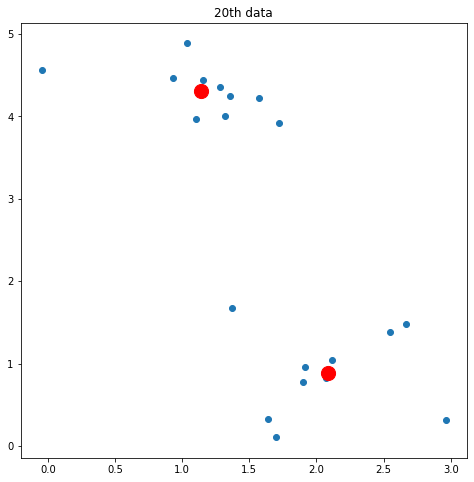

[[[ 1.32204456  4.00692132]
  [ 1.10149716  3.96214903]
  [ 1.35630545  4.24324444]
  [ 1.72329327  3.91287618]
  [ 1.15381537  4.43725706]
  [ 0.93498254  4.46802673]
  [-0.04492585  4.56523477]
  [ 1.03388751  4.88549673]
  [ 1.57390171  4.22172402]
  [ 1.28068517  4.35245733]]

 [[ 1.63584634  0.32965649]
  [ 2.11724649  1.04892867]
  [ 2.96316937  0.31591739]
  [ 2.07357093  0.82279012]
  [ 1.70015322  0.10534507]
  [ 2.66837921  1.48540717]
  [ 1.90033679  0.77674256]
  [ 2.54738379  1.3786156 ]
  [ 1.91610266  0.96020325]
  [ 1.37275945  1.67797382]]]
[10 10]
[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]
loser: 0
0


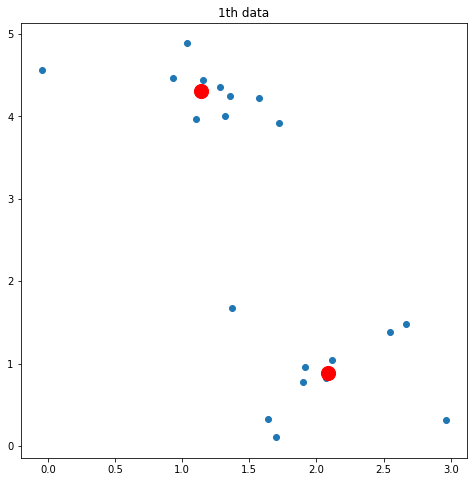

1


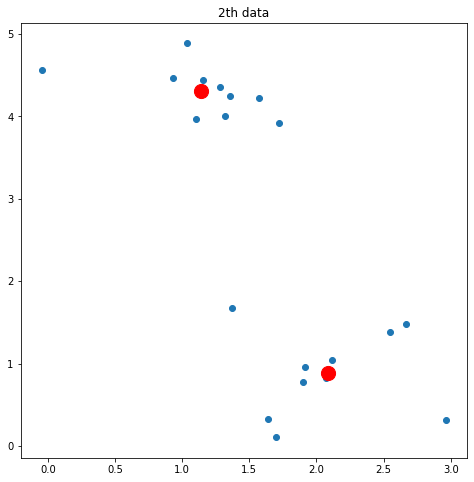

2


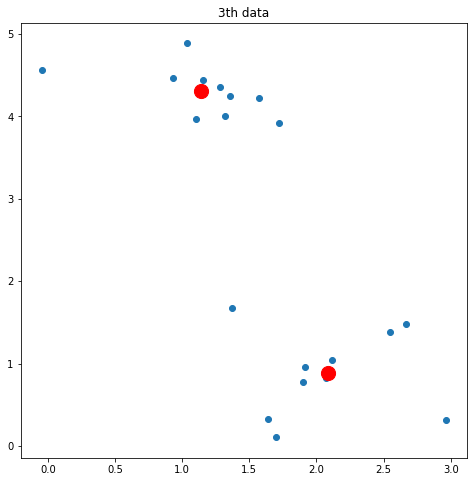

3


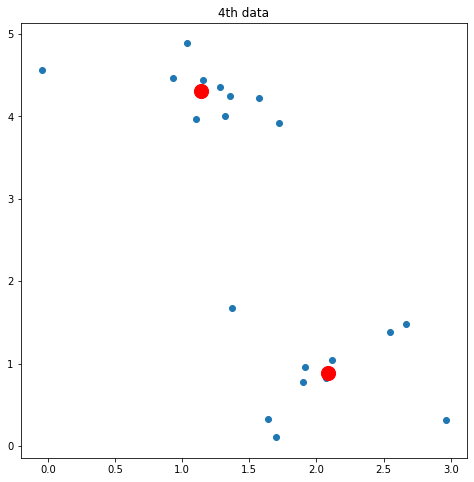

4


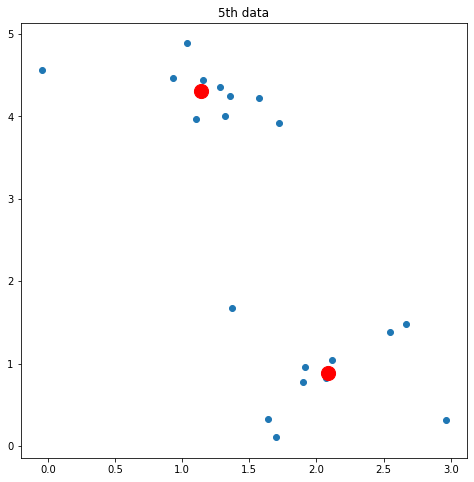

5


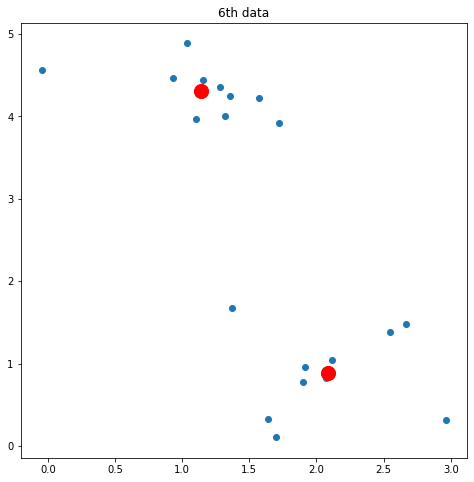

6


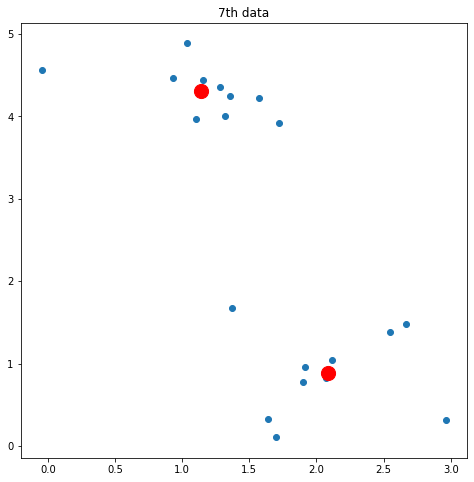

7


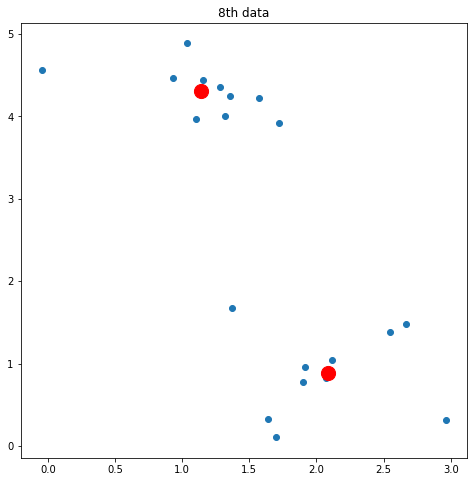

8


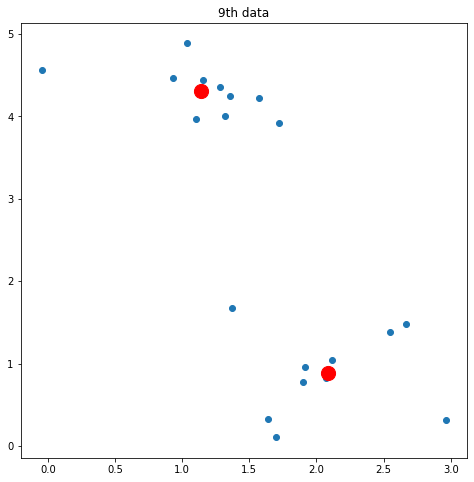

9


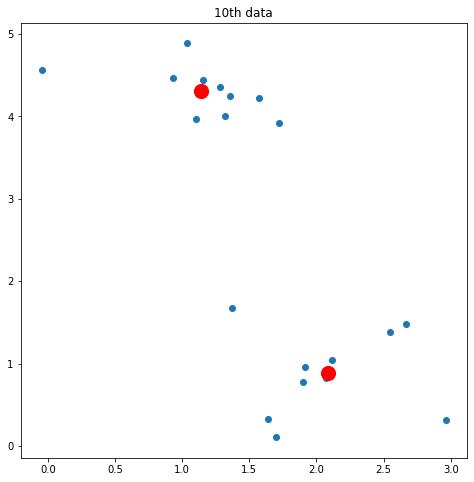

10


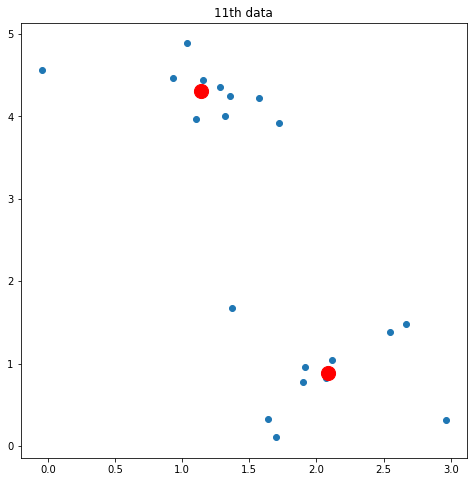

11


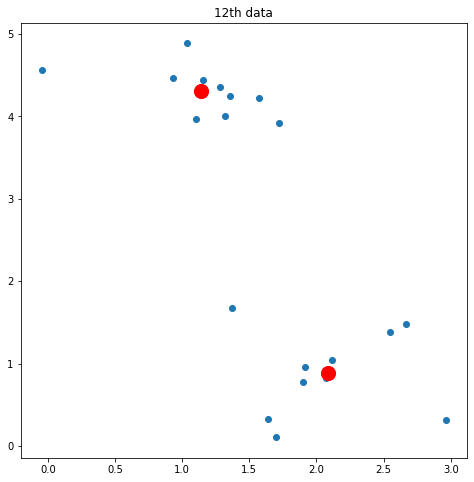

12


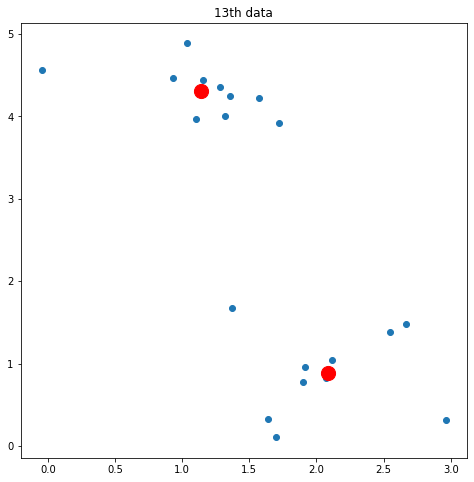

13


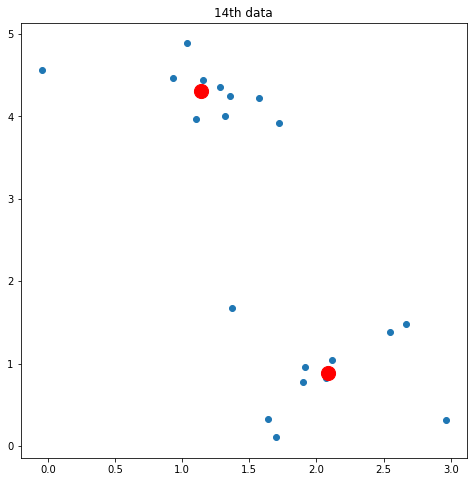

14


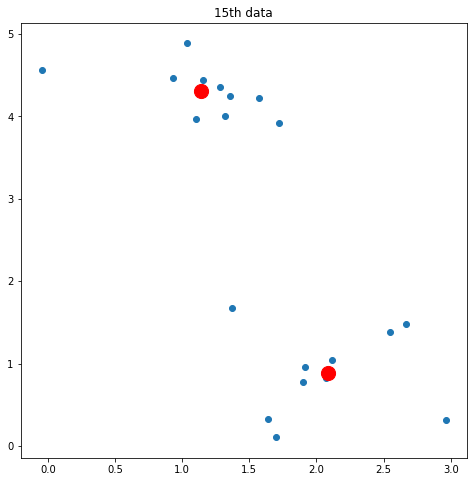

15


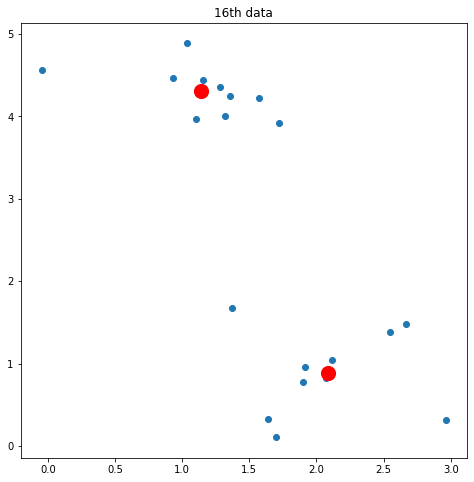

16


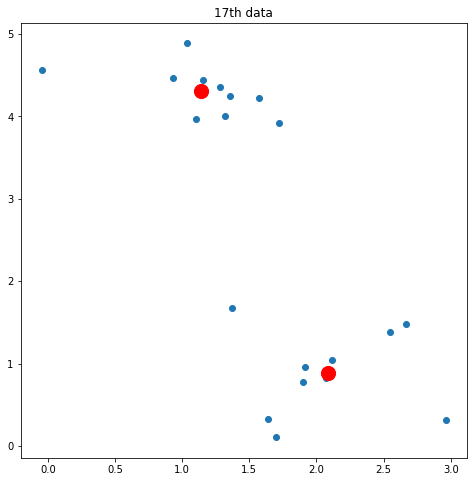

17


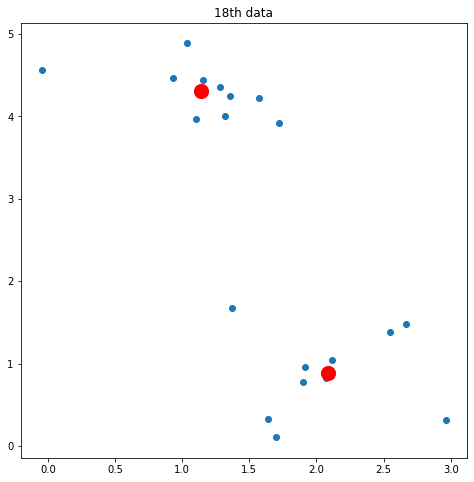

18


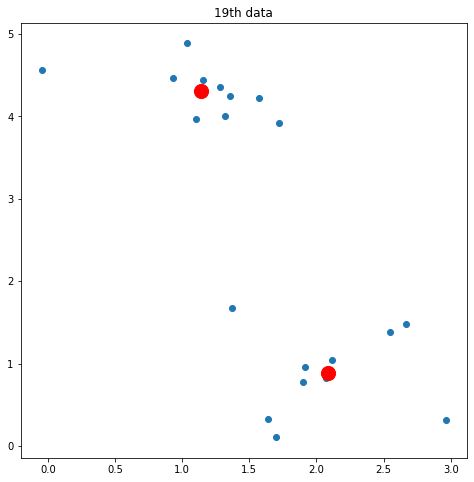

19


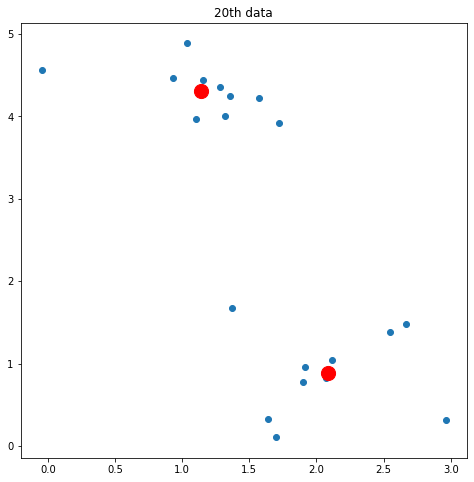

[[[ 1.32204456  4.00692132]
  [ 1.10149716  3.96214903]
  [ 1.35630545  4.24324444]
  [ 1.72329327  3.91287618]
  [ 1.15381537  4.43725706]
  [ 0.93498254  4.46802673]
  [-0.04492585  4.56523477]
  [ 1.03388751  4.88549673]
  [ 1.57390171  4.22172402]
  [ 1.28068517  4.35245733]]

 [[ 1.63584634  0.32965649]
  [ 2.11724649  1.04892867]
  [ 2.96316937  0.31591739]
  [ 2.07357093  0.82279012]
  [ 1.70015322  0.10534507]
  [ 2.66837921  1.48540717]
  [ 1.90033679  0.77674256]
  [ 2.54738379  1.3786156 ]
  [ 1.91610266  0.96020325]
  [ 1.37275945  1.67797382]]]
[10 10]
[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]
loser: 0
0


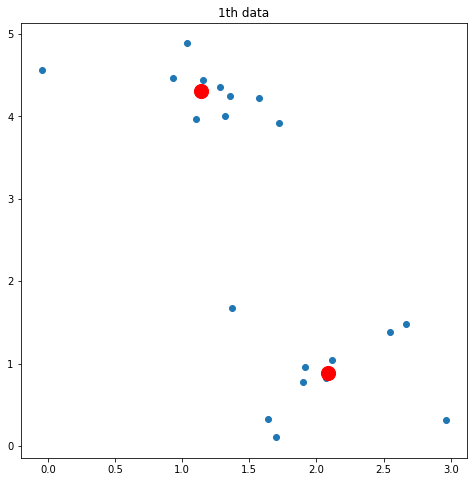

1


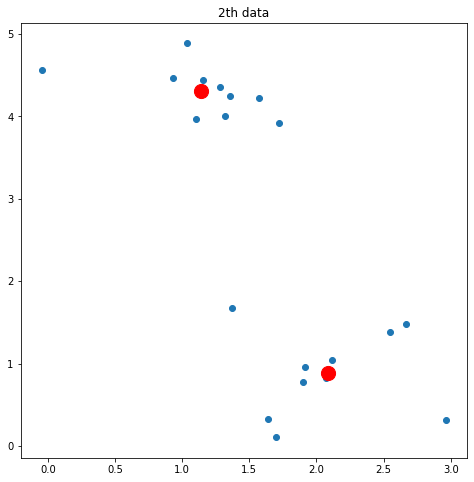

2


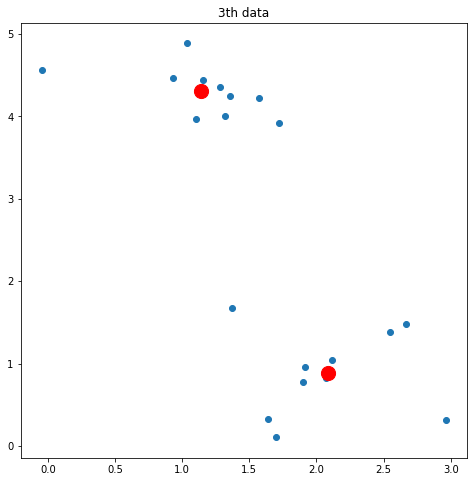

3


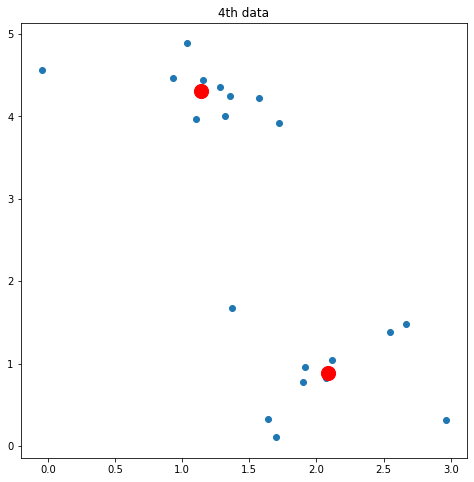

4


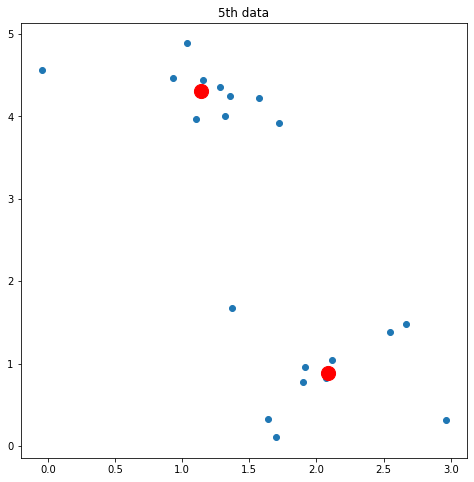

5


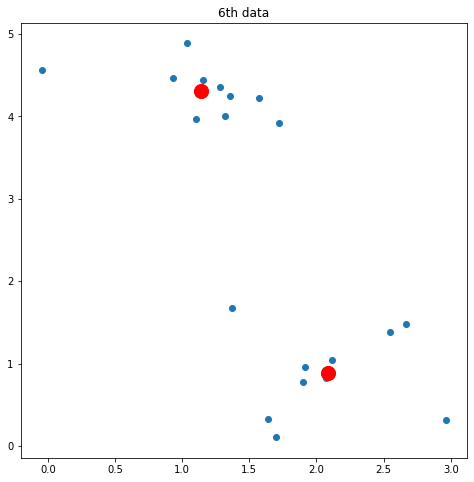

6


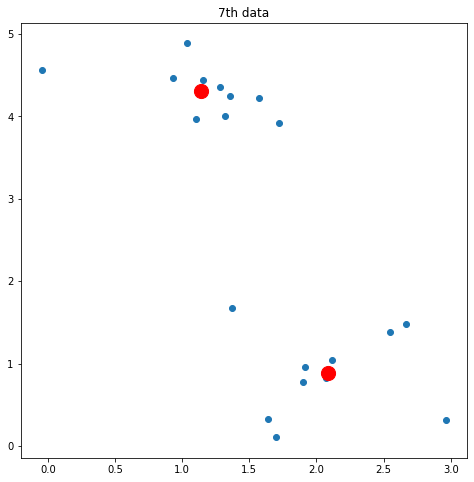

7


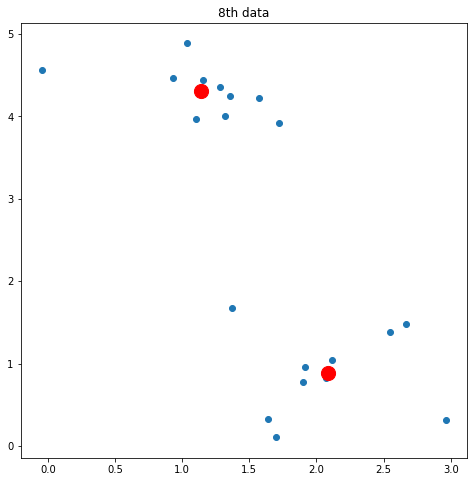

8


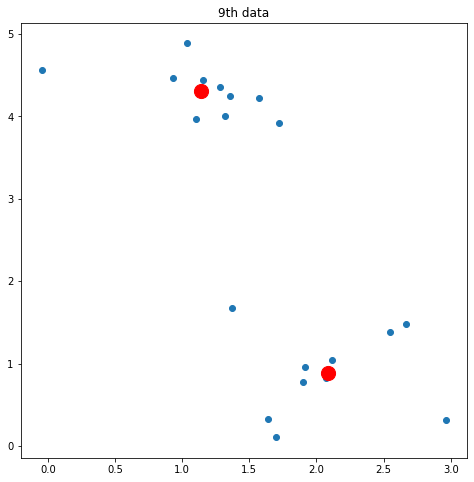

9


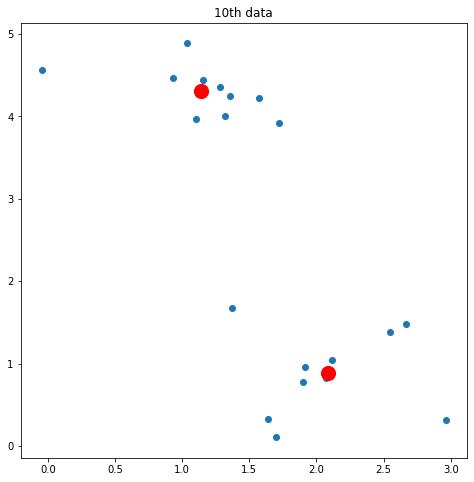

10


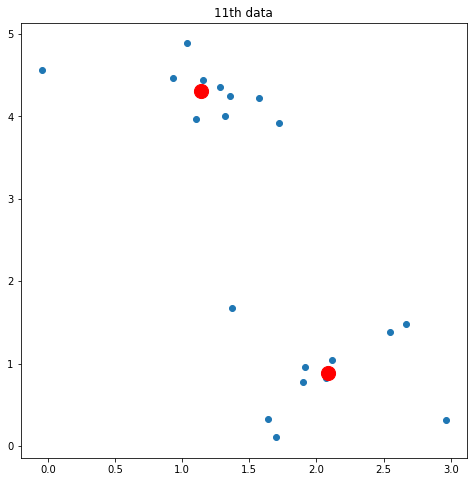

11


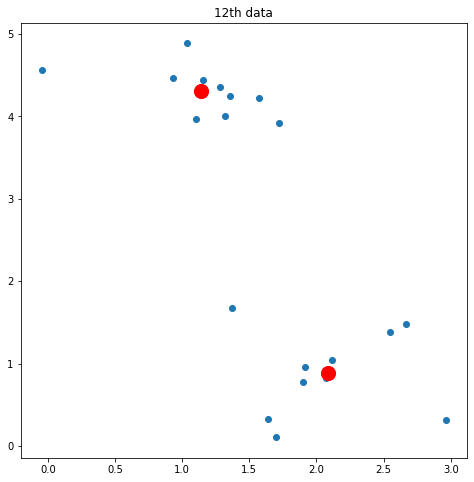

12


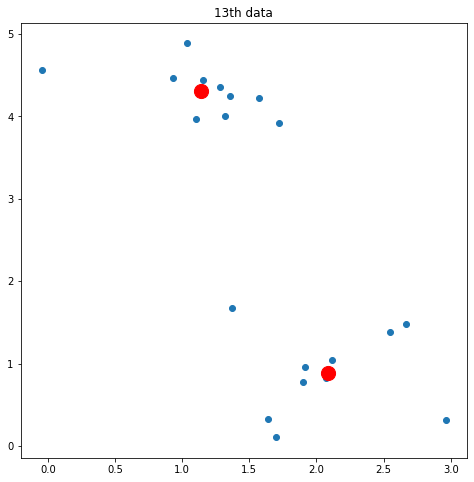

13


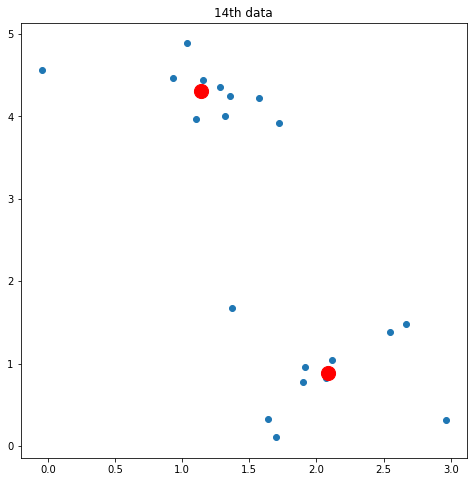

14


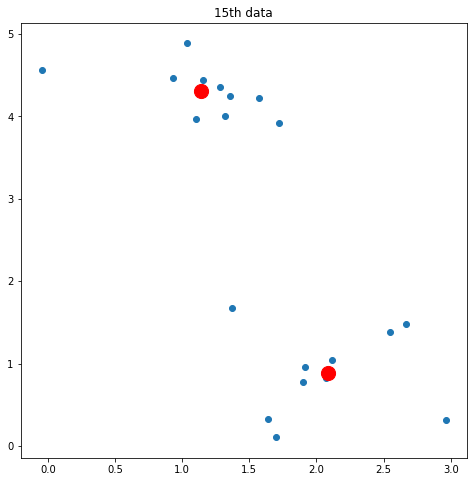

15


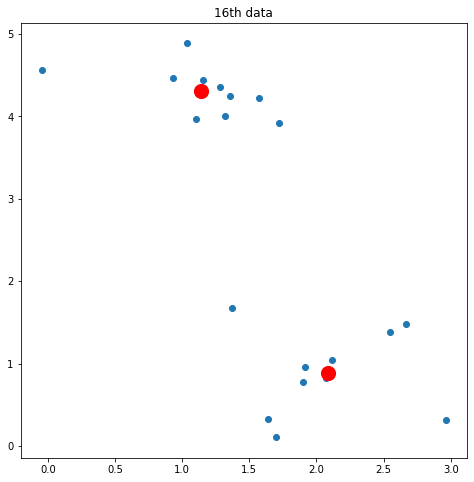

16


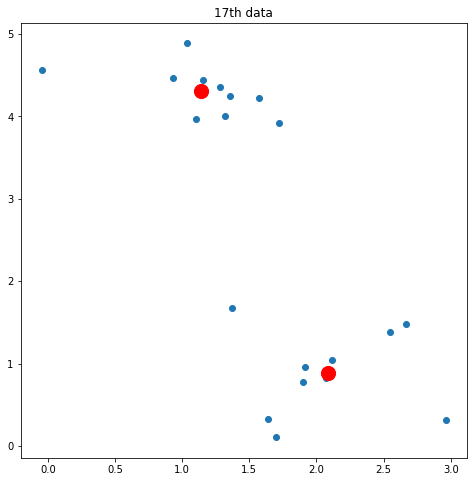

17


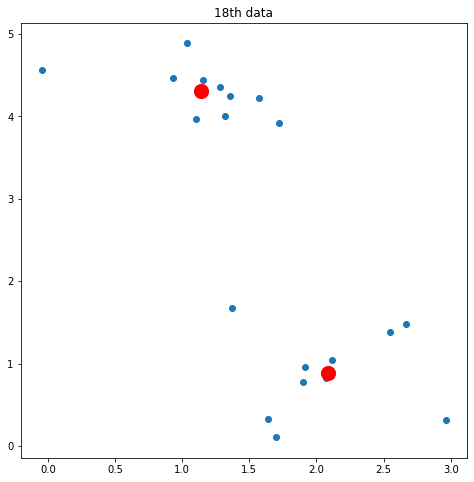

18


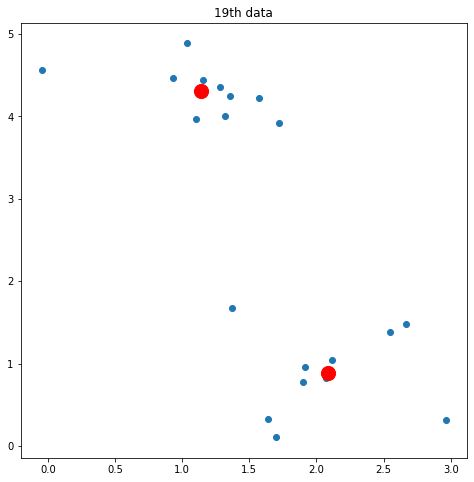

19


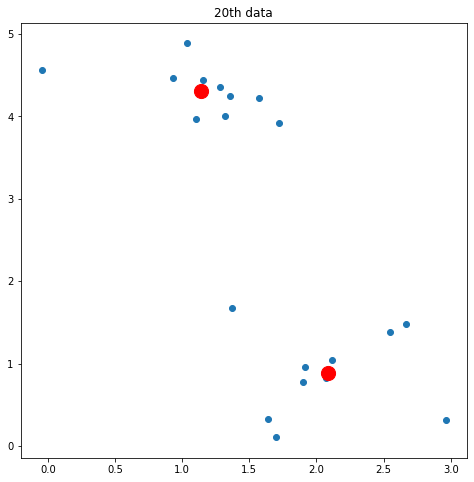

[[[ 1.32204456  4.00692132]
  [ 1.10149716  3.96214903]
  [ 1.35630545  4.24324444]
  [ 1.72329327  3.91287618]
  [ 1.15381537  4.43725706]
  [ 0.93498254  4.46802673]
  [-0.04492585  4.56523477]
  [ 1.03388751  4.88549673]
  [ 1.57390171  4.22172402]
  [ 1.28068517  4.35245733]]

 [[ 1.63584634  0.32965649]
  [ 2.11724649  1.04892867]
  [ 2.96316937  0.31591739]
  [ 2.07357093  0.82279012]
  [ 1.70015322  0.10534507]
  [ 2.66837921  1.48540717]
  [ 1.90033679  0.77674256]
  [ 2.54738379  1.3786156 ]
  [ 1.91610266  0.96020325]
  [ 1.37275945  1.67797382]]]
[10 10]
[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]
loser: 0
0


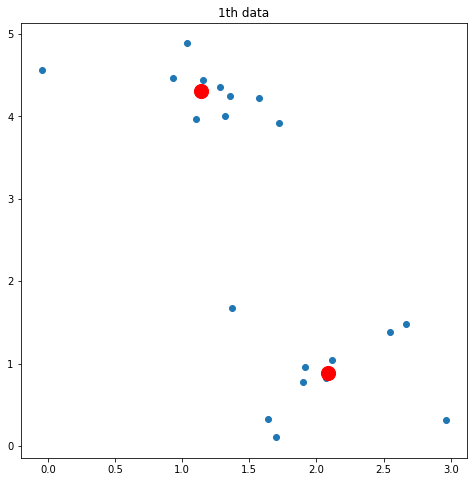

1


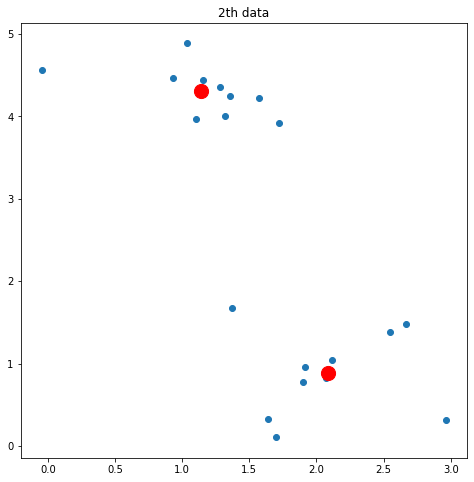

2


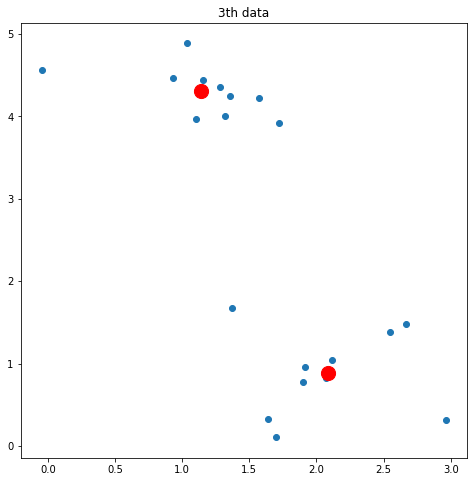

3


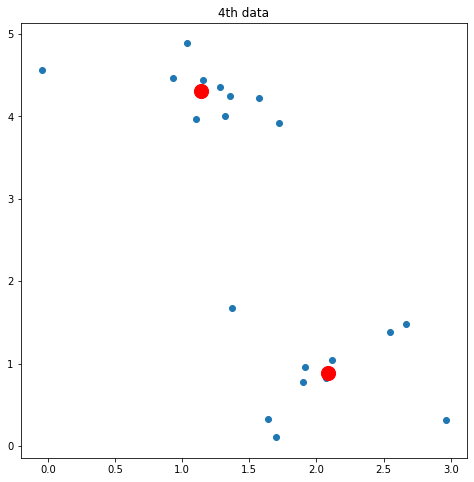

4


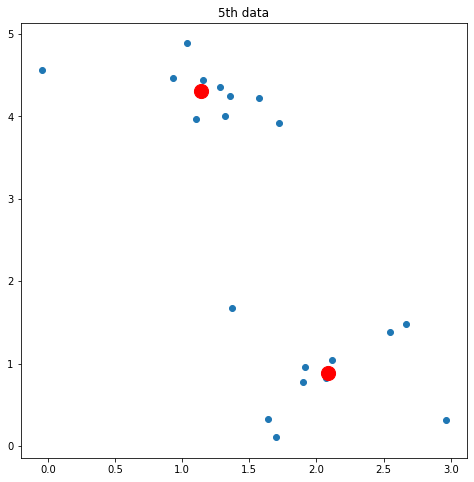

5


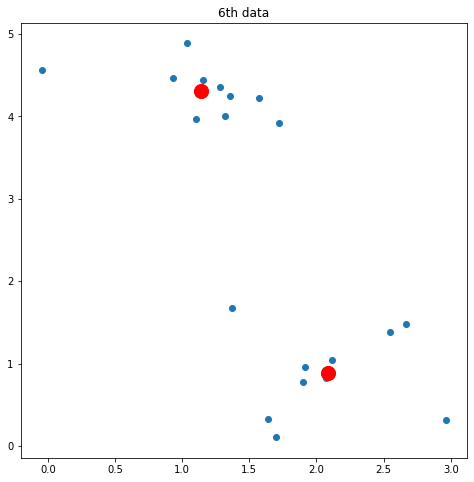

6


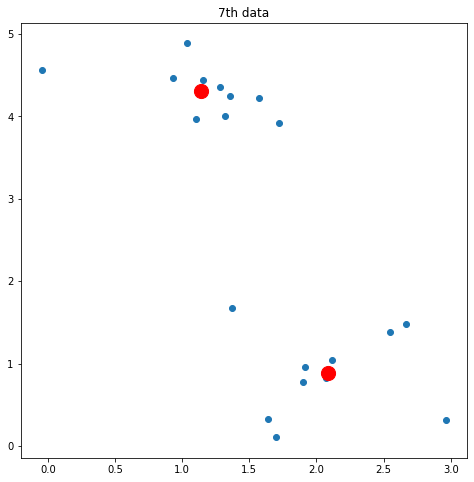

7


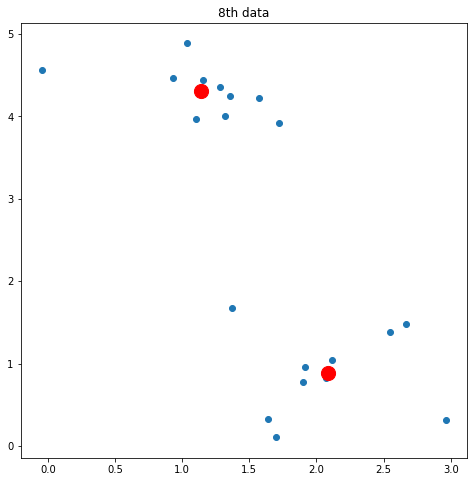

8


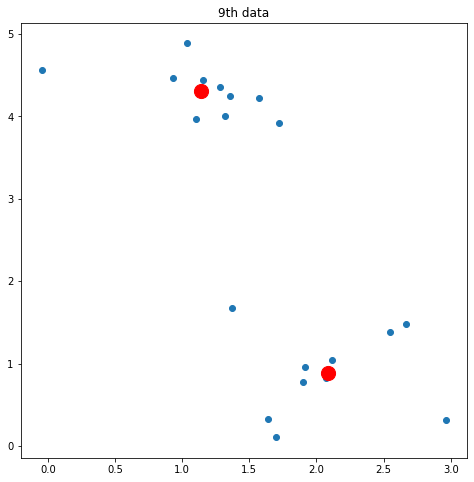

9


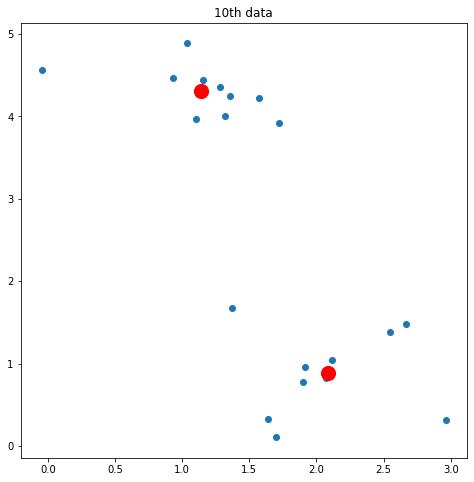

10


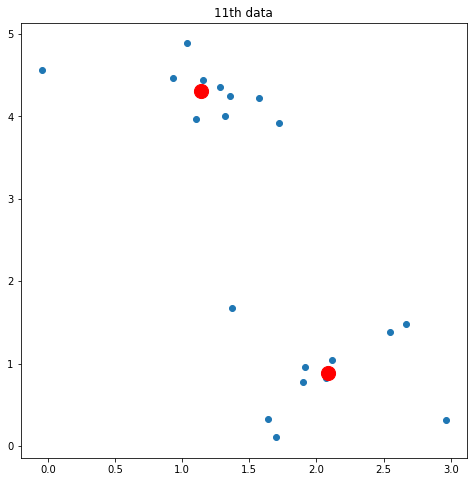

11


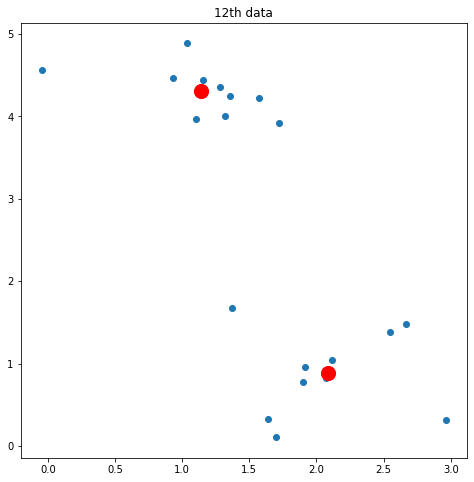

12


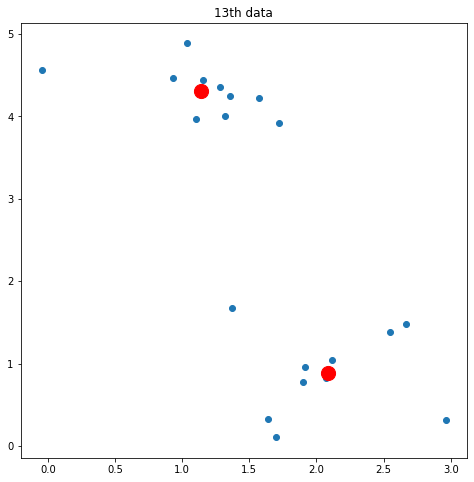

13


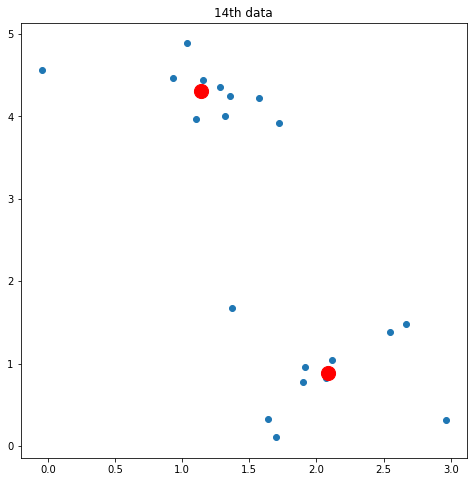

14


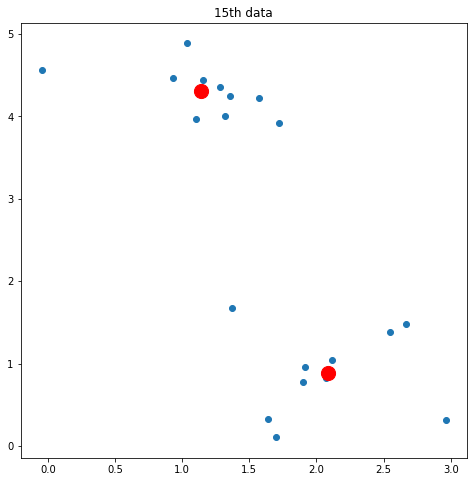

15


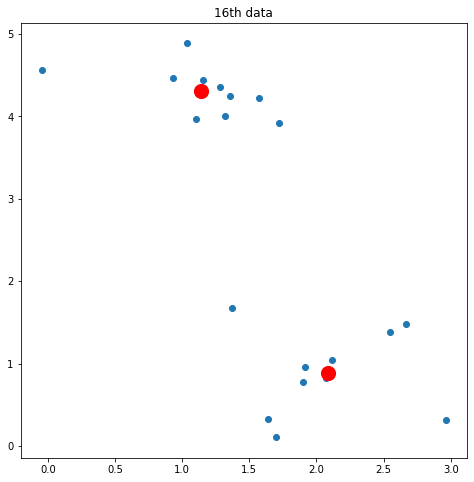

16


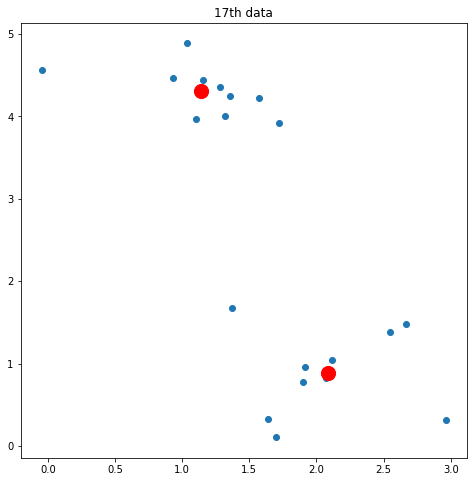

17


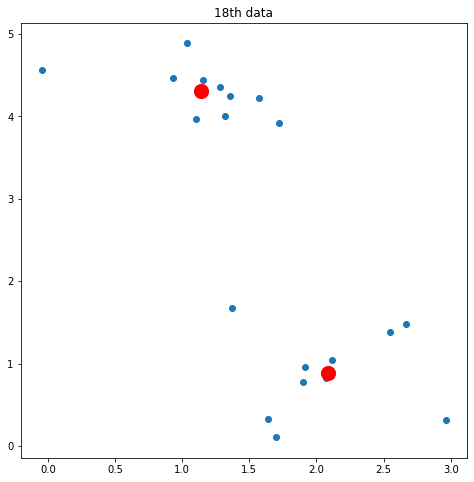

18


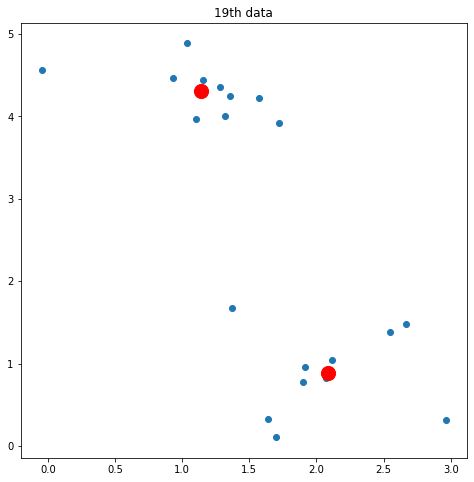

19


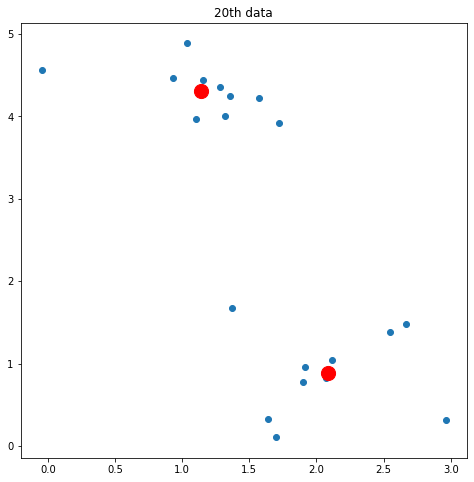

[[[ 1.32204456  4.00692132]
  [ 1.10149716  3.96214903]
  [ 1.35630545  4.24324444]
  [ 1.72329327  3.91287618]
  [ 1.15381537  4.43725706]
  [ 0.93498254  4.46802673]
  [-0.04492585  4.56523477]
  [ 1.03388751  4.88549673]
  [ 1.57390171  4.22172402]
  [ 1.28068517  4.35245733]]

 [[ 1.63584634  0.32965649]
  [ 2.11724649  1.04892867]
  [ 2.96316937  0.31591739]
  [ 2.07357093  0.82279012]
  [ 1.70015322  0.10534507]
  [ 2.66837921  1.48540717]
  [ 1.90033679  0.77674256]
  [ 2.54738379  1.3786156 ]
  [ 1.91610266  0.96020325]
  [ 1.37275945  1.67797382]]]
[10 10]
[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]
loser: 0


In [234]:
########## EPOCH 1+ ##########

loser = 0
epochs = 5

for epoch in range(epochs):
    loser = 0

    data_th = 0
    for i in range(len(X)):
        print(i)
        x = X[i]

        data_th = i+1
        # print(f"Process Data {data_th}")

        distances = []
        for w_i in w:
            dist = (x[0]-w_i[0])**2 + (x[1]-w_i[1])**2
            distances.append(dist)

        # find winner neuron of x
        current_cluster_index = distances.index(min(distances))

        # what was the winner for x in previous epoch
        x_th = i
        # print(x_th)
        previous_cluster_index = cluster_indices[x_th]

        # check if current neuron is a loser
        if previous_cluster_index != current_cluster_index:
            # update winner neuron
            w[current_cluster_index] = w[current_cluster_index] + (x - w[current_cluster_index])/(cluster_lengths[current_cluster_index]+1)

            # update loser neuron
            w[previous_cluster_index] = w[previous_cluster_index] - (x - w[previous_cluster_index])/(cluster_lengths[previous_cluster_index]-1)

            # append data to cluster
            cluster_elements[current_cluster_index].append(x)
            cluster_elements[previous_cluster_index].remove(x)
            # print(cluster_elements)     

            cluster_lengths[current_cluster_index] += 1
            cluster_lengths[previous_cluster_index] -= 1

            loser += 1

        plt.figure(figsize=(8,8))
        plt.scatter(X[:,0], X[:,1])

        plt.scatter(w[0][0], w[0][1], s=200, c='red')
        plt.scatter(w[1][0], w[1][1], s=200, c='red')
        plt.title(f"{data_th}th data")
        plt.show()

    # cluster_elements = np.array(cluster_elements)

    centroids = []
    for i in range(num_clusters):
        centroid_i = (np.average(cluster_elements[i][:,0]), np.average(cluster_elements[i][:,1]))
        centroids.append(centroid_i)

    # print("Weights:", w)    
    # print("Centroids:", centroids)
    print(cluster_elements)
    print(cluster_lengths)
    print(w)
    print(centroids)
    print("loser:", loser)
    
#     if loser == 0: 
#         print("Stop at Epoch ", epoch+1)
#         break

In [137]:
print(w_all)
print(centroids_all)

[array([1.14354869, 4.30553876]), array([2.08949483, 0.89015801])]
[(1.143548688257264, 4.305538760910819), (2.089494825113511, 0.8901580128187291)]


# Centroid Neural Network (n clusers)

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [39]:
def remove_element(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
    else:
        raise ValueError('array not found in list.')

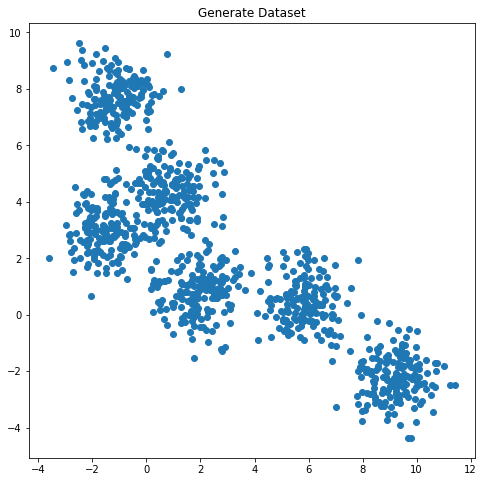

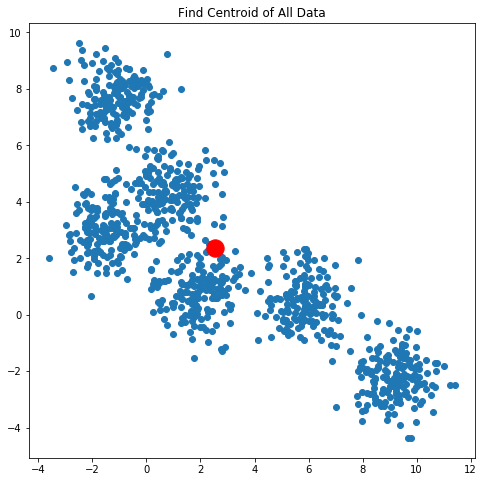

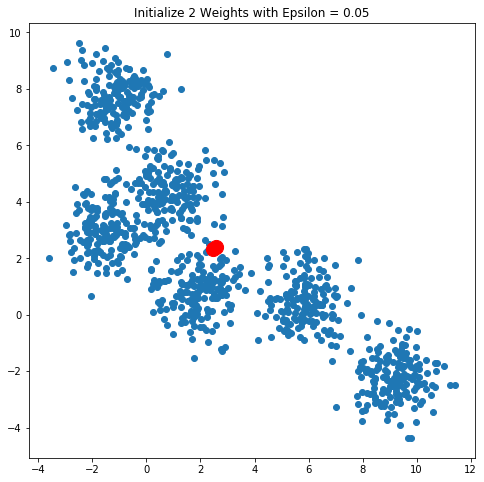

In [164]:
# Sample data
X, y = make_blobs(n_samples=1000, centers=6, cluster_std=0.8, random_state=0)
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1])
plt.title("Generate Dataset")
plt.show()

# Find Centroid of All Data
centroid_X = (np.average(X[:,0]), np.average(X[:,1]))
# print(centroid_X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroid_X[0], centroid_X[1], s=300, c='red')
plt.title("Find Centroid of All Data")
plt.show()

# Initialize W1 and W2 with Epsilon
epsilon = 0.05

w1 = [centroid_X[0] + epsilon, centroid_X[1] + epsilon]
w2 = [centroid_X[0] - epsilon, centroid_X[1] - epsilon]

w = []
w.append(w1)
w.append(w2)
# print(w)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])

plt.scatter(w1[0], w1[1], s=200, c='red')
plt.scatter(w2[0], w2[1], s=200, c='red')
plt.title(f"Initialize 2 Weights with Epsilon = {epsilon}")
plt.show()

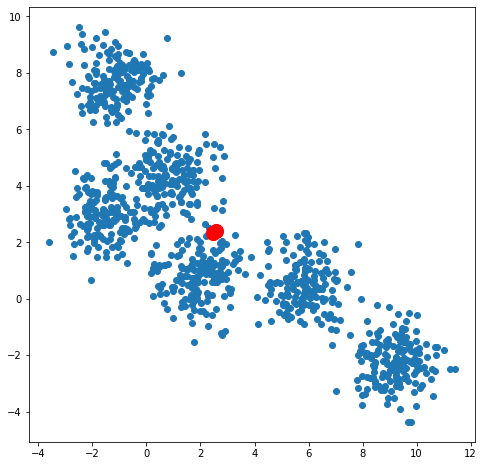

Weights: [array([ 6.96967048, -0.71843886]), array([-0.13728791,  4.20650398])]
Centroids: [(6.969670483536308, -0.7184388560102279), (-0.13728790581896208, 4.206503976002006)]


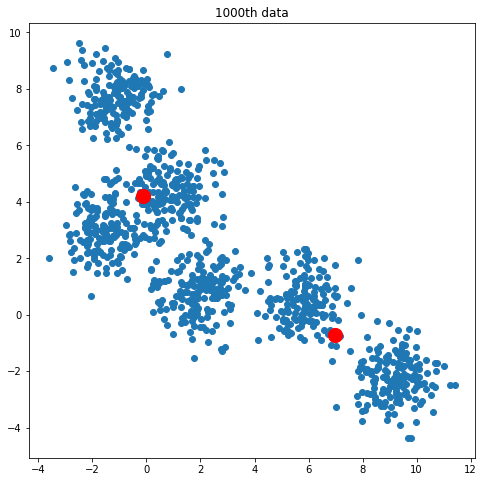

In [165]:
########## EPOCH 0 ##########

#### BEFORE ####
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])

plt.scatter(w[0][0], w[0][1], s=200, c='red')
plt.scatter(w[1][0], w[1][1], s=200, c='red')
# plt.title(f"{data_th}th data")
plt.show()
###

w = []
w.append(w1)
w.append(w2)

initial_clusters = 2

cluster_elements = []
for cluster in range(initial_clusters):
    cluster_i = []
    cluster_elements.append(cluster_i)
# print("Cluster Elements:", cluster_elements)

cluster_lengths = np.zeros(initial_clusters, dtype=int)
# print("Cluster Lengths:", cluster_lengths)

cluster_indices = []

data_th = 0
for i in range(len(X)):
    x = X[i]
    data_th = i+1
    # print(f"Process Data {data_th}")
    
    distances = []
    for w_i in w:
        dist = (x[0]-w_i[0])**2 + (x[1]-w_i[1])**2
        distances.append(dist)
    
    # find winner neuron
    index = distances.index(min(distances))
    
    # add cluster index of data x to a list
    cluster_indices.append(index)
    
    # update winner neuron
    w[index] = w[index] + 1/(1+cluster_lengths[index])*(x - w[index])
    
    # append data to cluster
    cluster_elements[index].append(x)
    # print(cluster_elements)
    
    cluster_lengths[index] += 1
    # print(cluster_lengths)

# print(len(cluster_indices), cluster_indices)
# print(cluster_lengths)

cluster_elements = np.array(cluster_elements)

centroids = []
for elements in cluster_elements:
    elements = np.array(elements)
    centroid_i = (np.average(elements[:,0]), np.average(elements[:,1]))
    centroids.append(centroid_i)

print("Weights:", w)    
print("Centroids:", centroids)

#### AFTER ####
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])

plt.scatter(w[0][0], w[0][1], s=200, c='red')
plt.scatter(w[1][0], w[1][1], s=200, c='red')
plt.title(f"{data_th}th data")
plt.show()

Start Epoch 1


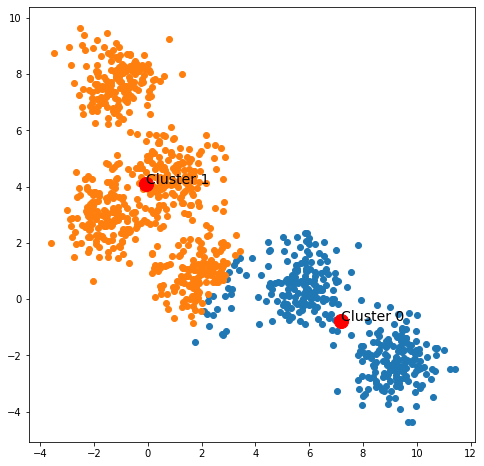

Loser = 18
Num of Elements in Clusers: [357 643]
Start Epoch 2


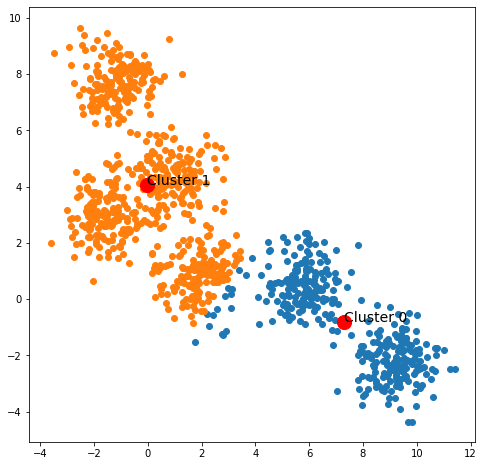

Loser = 9
Num of Elements in Clusers: [348 652]
Start Epoch 3


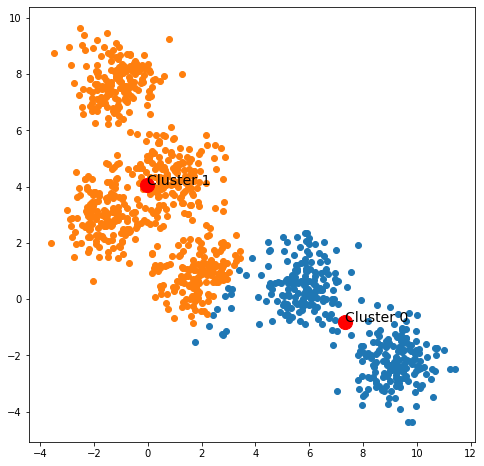

Loser = 1
Num of Elements in Clusers: [347 653]
Start Epoch 4


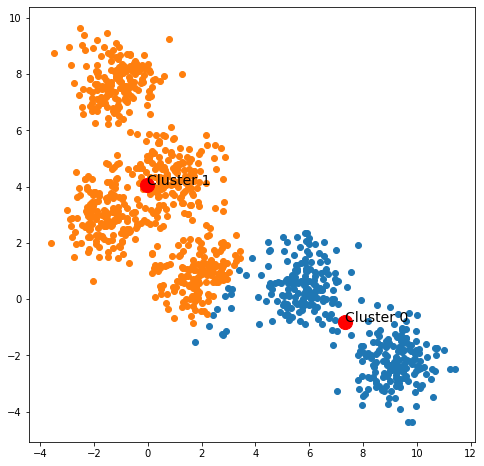

Loser = 0
Num of Elements in Clusers: [347 653]
Loser = 0, now starting to split weight
[833.8616192595047, 1795.56720960539]
Start to split Cluster 1
Start Epoch 5


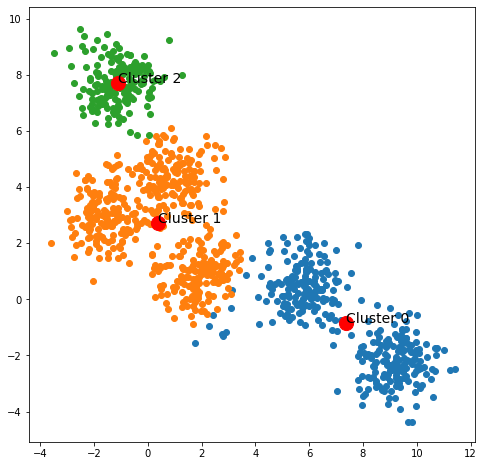

Loser = 175
Num of Elements in Clusers: [342 488 170]
Start Epoch 6


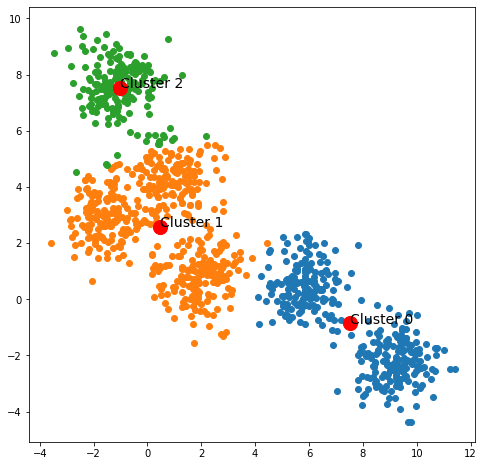

Loser = 26
Num of Elements in Clusers: [331 484 185]
Start Epoch 7


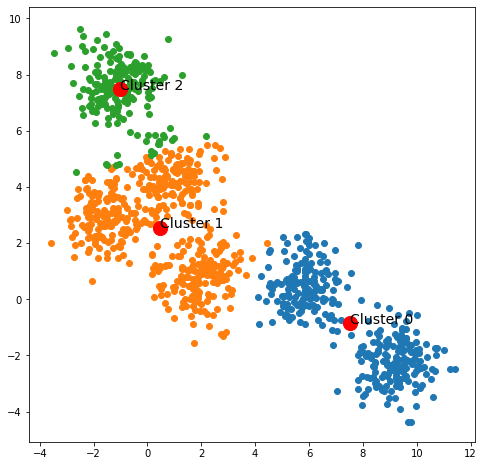

Loser = 5
Num of Elements in Clusers: [331 479 190]
Start Epoch 8


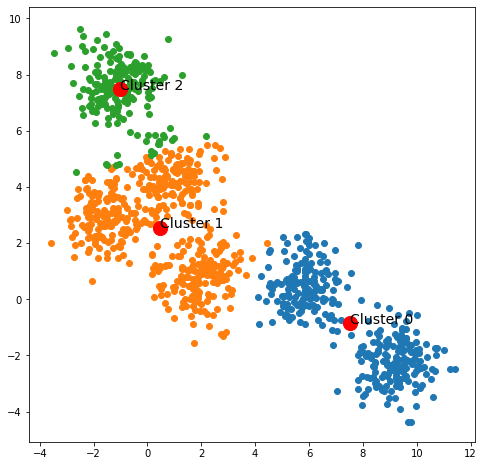

Loser = 0
Num of Elements in Clusers: [331 479 190]
Loser = 0, now starting to split weight
[760.7729378061878, 1044.6000425975876, 218.99814435872133]
Start to split Cluster 1
Start Epoch 9


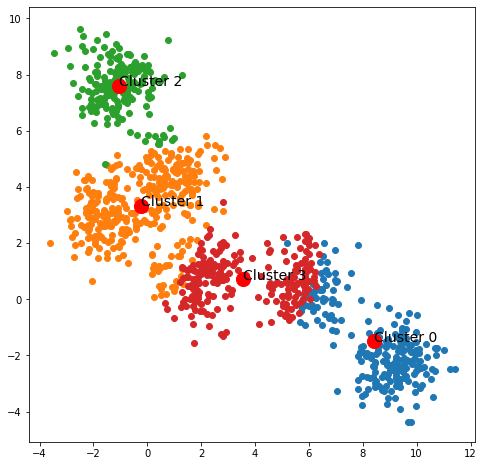

Loser = 243
Num of Elements in Clusers: [233 352 181 234]
Start Epoch 10


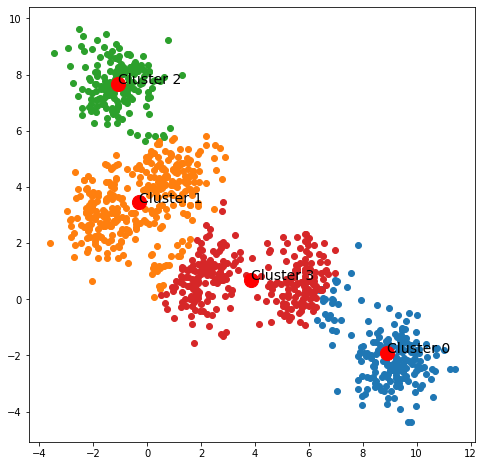

Loser = 61
Num of Elements in Clusers: [192 344 175 289]
Start Epoch 11


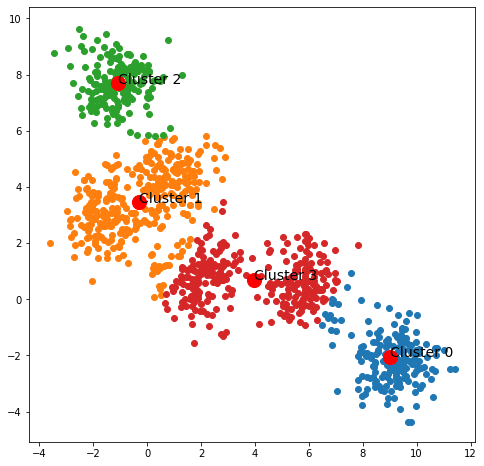

Loser = 14
Num of Elements in Clusers: [181 347 173 299]
Start Epoch 12


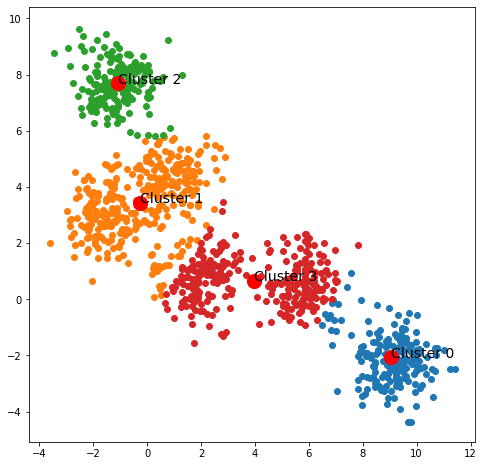

Loser = 3
Num of Elements in Clusers: [180 349 173 298]
Start Epoch 13


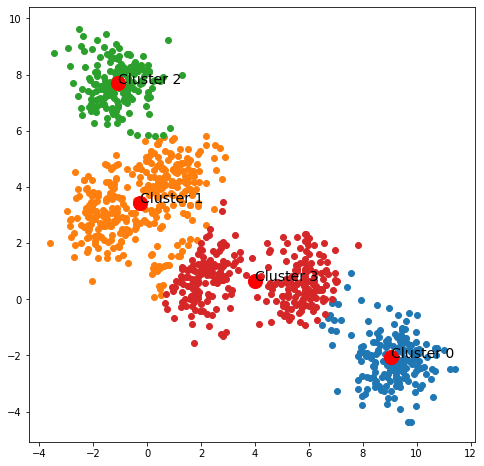

Loser = 1
Num of Elements in Clusers: [179 349 173 299]
Start Epoch 14


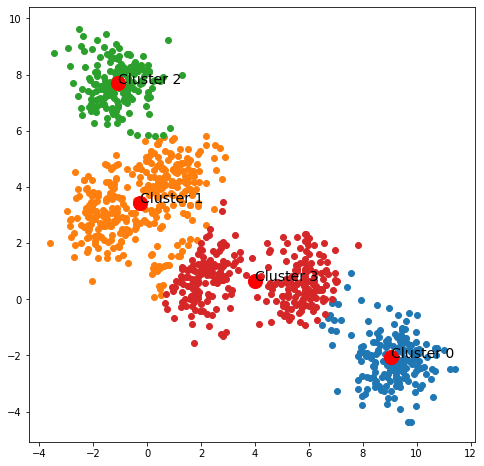

Loser = 0
Num of Elements in Clusers: [179 349 173 299]
Loser = 0, now starting to split weight
[202.96385057816457, 590.3333947751065, 170.10505406399795, 591.7038438545062]
Start to split Cluster 3
Start Epoch 15


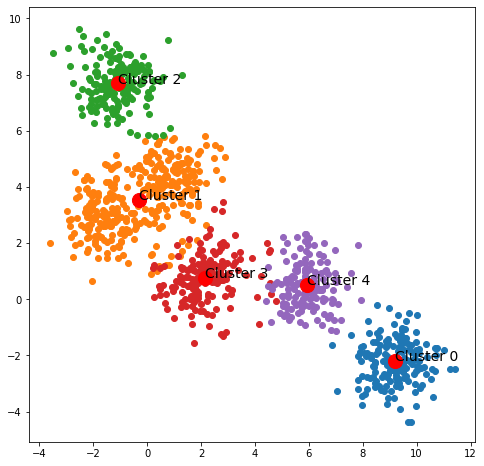

Loser = 170
Num of Elements in Clusers: [166 336 173 168 157]
Start Epoch 16


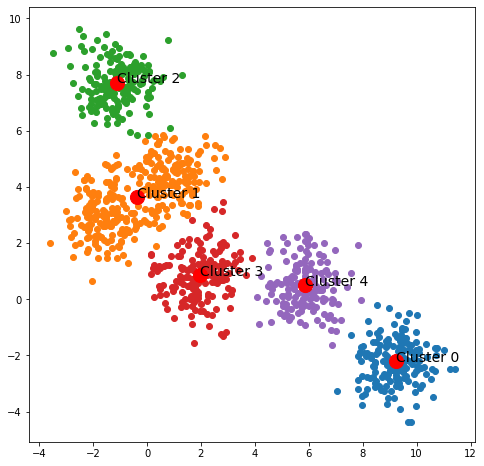

Loser = 27
Num of Elements in Clusers: [165 323 171 174 167]
Start Epoch 17


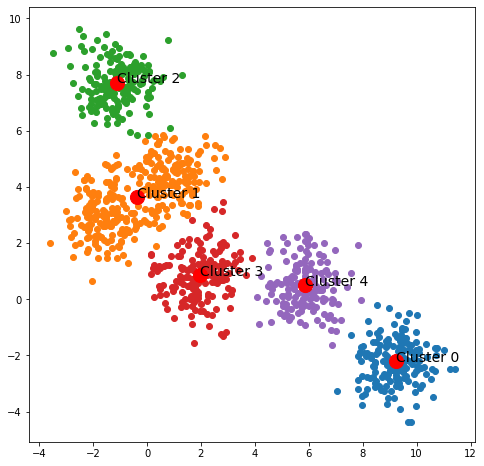

Loser = 0
Num of Elements in Clusers: [165 323 171 174 167]
Loser = 0, now starting to split weight
[162.0801333901563, 521.9800260953324, 165.27369926907085, 179.05580592471438, 161.96762739128604]
Start to split Cluster 1
Start Epoch 18


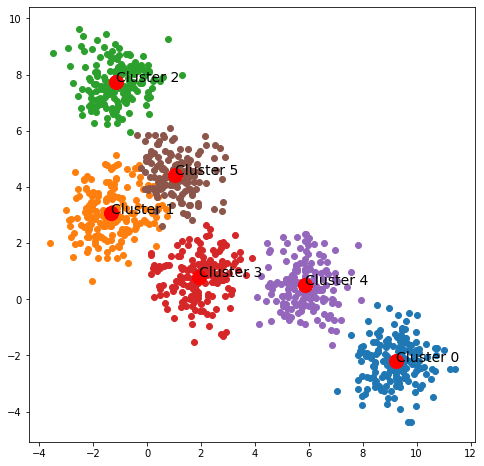

Loser = 141
Num of Elements in Clusers: [165 189 168 170 167 141]
Start Epoch 19


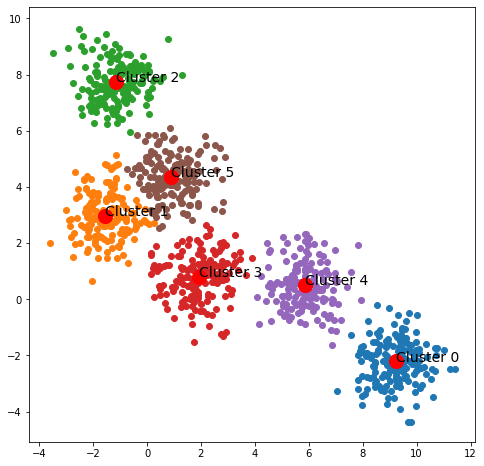

Loser = 23
Num of Elements in Clusers: [165 166 168 171 167 163]
Start Epoch 20


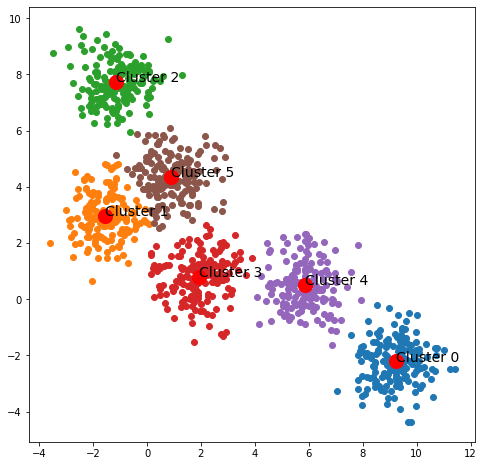

Loser = 2
Num of Elements in Clusers: [165 164 168 171 167 165]
Start Epoch 21


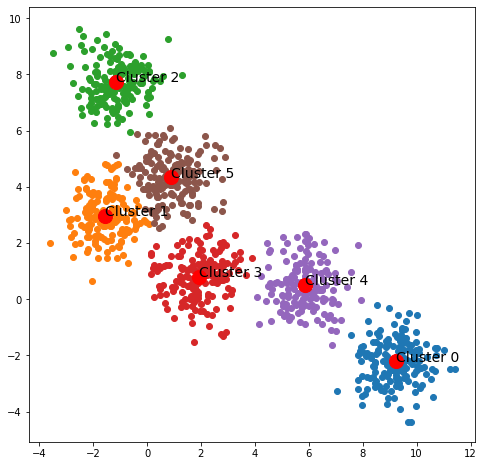

Loser = 1
Num of Elements in Clusers: [165 163 168 171 167 166]
Start Epoch 22


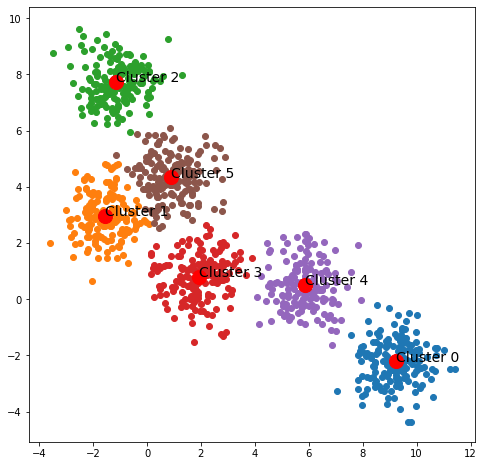

Loser = 0
Num of Elements in Clusers: [165 163 168 171 167 166]
Loser = 0, reach the desired num of clusters
Stop at Epoch  22


In [166]:
########## EPOCH 1+ - INCREASE NUM OF CLUSERS ##########

num_of_all_clusters = 6
epochs = 100

for epoch in range(epochs):
    print(f"Start Epoch {epoch+1}")
    
    loser = 0
    data_th = 0
    
    for i in range(len(X)):
        # print(i)
        x = X[i]

        data_th = i+1
        # print(f"Process Data {data_th}")

        distances = []
        for w_i in w:
            dist = (x[0]-w_i[0])**2 + (x[1]-w_i[1])**2
            distances.append(dist)

        # find winner neuron of x
        current_cluster_index = distances.index(min(distances))

        # what was the winner for x in previous epoch
        x_th = i
        # print(x_th)
        previous_cluster_index = cluster_indices[x_th]

        # check if current neuron is a loser
        if previous_cluster_index != current_cluster_index:
            # update winner neuron
            w[current_cluster_index] = w[current_cluster_index] + (x - w[current_cluster_index])/(cluster_lengths[current_cluster_index]+1)

            # update loser neuron
            w[previous_cluster_index] = w[previous_cluster_index] - (x - w[previous_cluster_index])/(cluster_lengths[previous_cluster_index]-1)
            
            # append and remove data to cluster
            cluster_elements[current_cluster_index].append(x)
            remove_element(cluster_elements[previous_cluster_index], x)
            # print(cluster_elements)     
            
            # update cluster index
            cluster_indices[x_th] = current_cluster_index

            cluster_lengths[current_cluster_index] += 1
            cluster_lengths[previous_cluster_index] -= 1

            loser += 1
            
            # print(f"Epoch {epoch+1}")
            # print(f"Data {x_th+1} moves from Cluster {previous_cluster_index} to Cluster {current_cluster_index}")

    plt.figure(figsize=(8,8))
    # plt.scatter(X[:,0], X[:,1])

    for j in range(len(w)):
        displayed_data = np.array(cluster_elements[j])
        plt.scatter(displayed_data[:,0], displayed_data[:,1])
        plt.scatter(w[j][0], w[j][1], s=200, c='red')
        plt.text(w[j][0], w[j][1], f"Cluster {j}", fontsize=14)

    # plt.title(f"{data_th}th data")
    plt.show()

    cluster_elements = np.array(cluster_elements)

    centroids = []
    for elements in cluster_elements:
        elements = np.array(elements)
        centroid_i = (np.average(elements[:,0]), np.average(elements[:,1]))
        centroids.append(centroid_i)

    # print(cluster_elements)     
    # print(cluster_lengths)
    
    # print(cluster_indices)
    # print("Weights:", w)    
    # print("Centroids:", centroids)
    # print("loser:", loser)
    
    print("Loser =", loser)
    print("Num of Elements in Clusers:", cluster_lengths)
    
    if loser == 0: 
        if len(w) == num_of_all_clusters:
            print("Loser = 0, reach the desired num of clusters")
            print("Stop at Epoch ", epoch+1)
            break
        
        else:
            print("Loser = 0, now starting to split weight")
            all_error = []
            for i in range(len(w)):
                
                # calculate error
                error = 0
                for x in cluster_elements[i]:
                    error += np.sqrt((x[0] - w[i][0])**2 + (x[1] - w[i][1])**2)

                all_error.append(error)
            
            print(all_error)
            
            splitted_index = all_error.index(max(all_error))
            print(f"Start to split Cluster {splitted_index}")

            new_w = [w[splitted_index][0] + epsilon, w[splitted_index][1] + epsilon]
            w.append(new_w)

            new_cluster_thing = []

            cluster_elements = list(cluster_elements)
            cluster_elements.append(new_cluster_thing)
            cluster_elements = np.array(cluster_elements)

            cluster_lengths = list(cluster_lengths)
            cluster_lengths.append(0)
            cluster_lengths = np.array(cluster_lengths)

            # print(w)
            # print(cluster_elements)
            # print(cluster_lengths)
            
# print(cluster_indices)
# print("Weights:", w)    
# print("Centroids:", centroids)
# print("loser:", loser)

# Compare with K-Means

In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

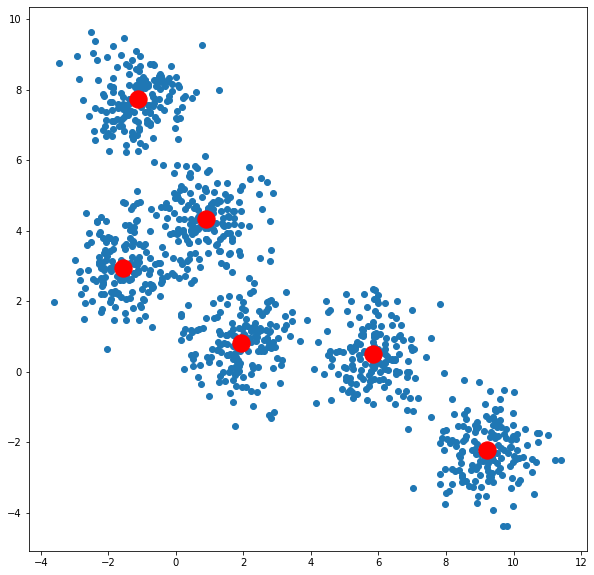

In [167]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=22, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()